In [2]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy import stats  
from sklearn import linear_model
#import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
from sklearn.metrics import r2_score
import statsmodels.api as sm

In [3]:
KBB_df = pd.read_csv('KBB_df(6).csv')

In [4]:
del KBB_df['Unnamed: 0']
del KBB_df['Unnamed: 0.1']
del KBB_df['Year']
del KBB_df['Maker']
del KBB_df['Model']

In [5]:
KBB_df['depreciation'] = KBB_df['depreciation'].astype(float)

In [79]:
#valuecounts on safety rating then divide by len of the whole dataframe 
#as there is only three ratings for safety which are nothing, 4, and 5. Replace nothing with zero so the algorithm will work

In [6]:
KBB_df.isnull().any()
KBB_df.fillna(0, inplace= True)

In [7]:
KBB_df = KBB_df.fillna(0)

In [8]:
KBB_df['Sale_price_in_USD'] = KBB_df['price in USD'].astype(float)
KBB_df['Original_Price'] = KBB_df['New_Price'].astype(float)
KBB_df['brand'] = KBB_df['brand'].astype(str)

In [9]:
KBB_df['depreciation'] = (KBB_df['Sale_price_in_USD']/KBB_df['Original_Price']).apply(lambda x: 1 - x)

In [10]:
KBB_df['depreciation per year'] = KBB_df['depreciation']/KBB_df['years since new']

In [11]:
KBB_df['expected_depreciation'] = KBB_df['years since new'].apply(lambda x: x*KBB_df['depreciation per year'].mean())

In [12]:
KBB_df.head()

,brand,condition,fuel,kms driven,model,price in USD,price,depreciation,registered city,transaction type,...,MP3 Player,Premium Radio,Satellite Radio,Bluetooth Streaming Audio,CD Player,iPod Interface,Sale_price_in_USD,Original_Price,depreciation per year,expected_depreciation
0,toyota,new,petrol,1,yaris,323.52,"50,000.00",0.979689,karachi,cash,...,1,1,0,1,1,0,323.52,15928.0,0.979689,0.108453
1,toyota,used,petrol,100000,yaris,608.22,"94,000.00",0.958367,lahore,cash,...,1,0,0,0,1,0,608.22,14609.0,0.136910,0.759173
2,toyota,used,cng,100000,86,1164.67,"180,000.00",0.956662,karachi,cash,...,0,0,0,1,0,0,1164.67,26874.0,0.956662,0.108453
3,toyota,used,cng,22,86,1261.73,"195,000.00",0.953050,karachi,cash,...,0,0,0,1,0,0,1261.73,26874.0,0.953050,0.108453
4,toyota,used,petrol,66000,yaris,724.68,"112,000.00",0.946220,islamabad,installment/leasing,...,1,0,0,0,1,0,724.68,13475.0,0.086020,1.192987


In [13]:
KBB_df['MPG'] = KBB_df['MPG'].str.replace(r'MPG', '')
KBB_df['HP'] = KBB_df['HP'].str.replace(r'HP', '')

In [14]:
KBB_df['MPG'] = KBB_df['MPG'].astype(float)

In [15]:
KBB_df['HP'] = KBB_df['HP'].astype(float)

In [16]:
KBB_df.corr()

,kms driven,price in USD,depreciation,year,years since new,New_Price,MPG,HP,Expert-Rating,Consumer-Rating,...,MP3 Player,Premium Radio,Satellite Radio,Bluetooth Streaming Audio,CD Player,iPod Interface,Sale_price_in_USD,Original_Price,depreciation per year,expected_depreciation
kms driven,1.000000,-0.057753,0.077882,-0.173623,0.173623,-0.035956,-0.072411,0.006587,-0.008586,-0.196013,...,-0.048749,-0.073384,0.003287,-0.102519,-0.001203,-0.007281,-0.057753,-0.035956,-0.077939,0.173623
price in USD,-0.057753,1.000000,-0.747627,0.248045,-0.248045,0.659372,0.099919,0.503113,0.028461,0.100305,...,-0.077740,0.227016,0.127028,0.199584,-0.091040,0.142317,1.000000,0.659372,-0.271224,-0.248045
depreciation,0.077882,-0.747627,1.000000,-0.392059,0.392059,-0.150746,-0.213750,0.018479,0.123804,-0.173537,...,-0.112518,-0.107438,-0.095995,-0.284921,-0.034495,-0.037025,-0.747627,-0.150746,0.440362,0.392059
year,-0.173623,0.248045,-0.392059,1.000000,-1.000000,0.148483,0.493294,-0.243327,-0.340732,0.196710,...,0.093435,0.252581,0.128758,0.678120,-0.154170,0.035294,0.248045,0.148483,0.415144,-1.000000
years since new,0.173623,-0.248045,0.392059,-1.000000,1.000000,-0.148483,-0.493294,0.243327,0.340732,-0.196710,...,-0.093435,-0.252581,-0.128758,-0.678120,0.154170,-0.035294,-0.248045,-0.148483,-0.415144,1.000000
New_Price,-0.035956,0.659372,-0.150746,0.148483,-0.148483,1.000000,0.018970,0.735519,0.023304,0.068338,...,-0.202721,0.241245,0.152632,0.116283,-0.224681,0.165820,0.659372,1.000000,0.066244,-0.148483
MPG,-0.072411,0.099919,-0.213750,0.493294,-0.493294,0.018970,1.000000,-0.502200,-0.109414,0.472075,...,-0.150480,-0.071836,-0.044372,0.423288,-0.259145,-0.069066,0.099919,0.018970,0.015790,-0.493294
HP,0.006587,0.503113,0.018479,-0.243327,0.243327,0.735519,-0.502200,1.000000,0.240256,-0.242060,...,-0.215634,0.194618,0.171553,-0.231867,-0.203906,0.154557,0.503113,0.735519,0.008842,0.243327
Expert-Rating,-0.008586,0.028461,0.123804,-0.340732,0.340732,0.023304,-0.109414,0.240256,1.000000,0.190874,...,-0.096203,0.071495,-0.407587,-0.250050,-0.044281,-0.011877,0.028461,0.023304,-0.018345,0.340732
Consumer-Rating,-0.196013,0.100305,-0.173537,0.196710,-0.196710,0.068338,0.472075,-0.242060,0.190874,1.000000,...,0.007694,-0.064884,-0.175434,0.099417,-0.016007,-0.039536,0.100305,0.068338,-0.017384,-0.196710


In [17]:
KBB_df.describe()

,kms driven,price in USD,depreciation,year,years since new,New_Price,MPG,HP,Expert-Rating,Consumer-Rating,...,MP3 Player,Premium Radio,Satellite Radio,Bluetooth Streaming Audio,CD Player,iPod Interface,Sale_price_in_USD,Original_Price,depreciation per year,expected_depreciation
count,1.179000e+03,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1173.000000,1146.000000,1179.000000,1179.000000,...,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000
mean,9.707247e+04,10089.146760,0.478879,2011.229008,7.770992,18948.329941,36.714408,121.346422,4.046735,4.676166,...,0.880407,0.259542,0.147583,0.510602,0.910941,0.003393,10089.146760,18948.329941,0.108453,0.842790
std,3.318248e+05,5946.466843,0.190938,5.409713,5.409713,7467.908851,10.548172,38.750546,0.598296,0.149363,...,0.324623,0.438569,0.354836,0.500100,0.284949,0.058173,5946.466843,7467.908851,0.162178,0.586701
min,1.000000e+00,323.520000,0.004554,1992.000000,1.000000,9689.000000,15.000000,74.000000,0.000000,3.700000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,323.520000,9689.000000,0.001173,0.108453
25%,3.600000e+04,6793.920000,0.351679,2008.000000,4.000000,14916.000000,31.000000,99.000000,3.900000,4.600000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,6793.920000,14916.000000,0.047332,0.433813
50%,6.900000e+04,9705.600000,0.444640,2013.000000,6.000000,17585.000000,32.000000,106.000000,4.100000,4.700000,...,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,9705.600000,17585.000000,0.065449,0.650720
75%,9.999900e+04,12439.340000,0.566778,2015.000000,11.000000,21208.000000,50.000000,130.000000,4.600000,4.800000,...,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,12439.340000,21208.000000,0.090889,1.192987
max,1.000000e+07,46586.870000,0.979689,2018.000000,27.000000,157143.000000,52.000000,357.000000,4.800000,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,46586.870000,157143.000000,0.979689,2.928240


In [18]:
KBB_df[['kms driven', 'Sale_price_in_USD', 'years since new', 'MPG', 'HP', 'Expert-Rating', 'Consumer-Rating', 'SafetyRating', 'depreciation per year']].corr()

,kms driven,Sale_price_in_USD,years since new,MPG,HP,Expert-Rating,Consumer-Rating,SafetyRating,depreciation per year
kms driven,1.000000,-0.057753,0.173623,-0.072411,0.006587,-0.008586,-0.196013,-0.069061,-0.077939
Sale_price_in_USD,-0.057753,1.000000,-0.248045,0.099919,0.503113,0.028461,0.100305,0.163208,-0.271224
years since new,0.173623,-0.248045,1.000000,-0.493294,0.243327,0.340732,-0.196710,-0.530088,-0.415144
MPG,-0.072411,0.099919,-0.493294,1.000000,-0.502200,-0.109414,0.472075,0.525079,0.015790
HP,0.006587,0.503113,0.243327,-0.502200,1.000000,0.240256,-0.242060,-0.194939,0.008842
Expert-Rating,-0.008586,0.028461,0.340732,-0.109414,0.240256,1.000000,0.190874,-0.136331,-0.018345
Consumer-Rating,-0.196013,0.100305,-0.196710,0.472075,-0.242060,0.190874,1.000000,0.102023,-0.017384
SafetyRating,-0.069061,0.163208,-0.530088,0.525079,-0.194939,-0.136331,0.102023,1.000000,0.121775
depreciation per year,-0.077939,-0.271224,-0.415144,0.015790,0.008842,-0.018345,-0.017384,0.121775,1.000000


In [19]:
KBB_df.shape

(1179, 46)

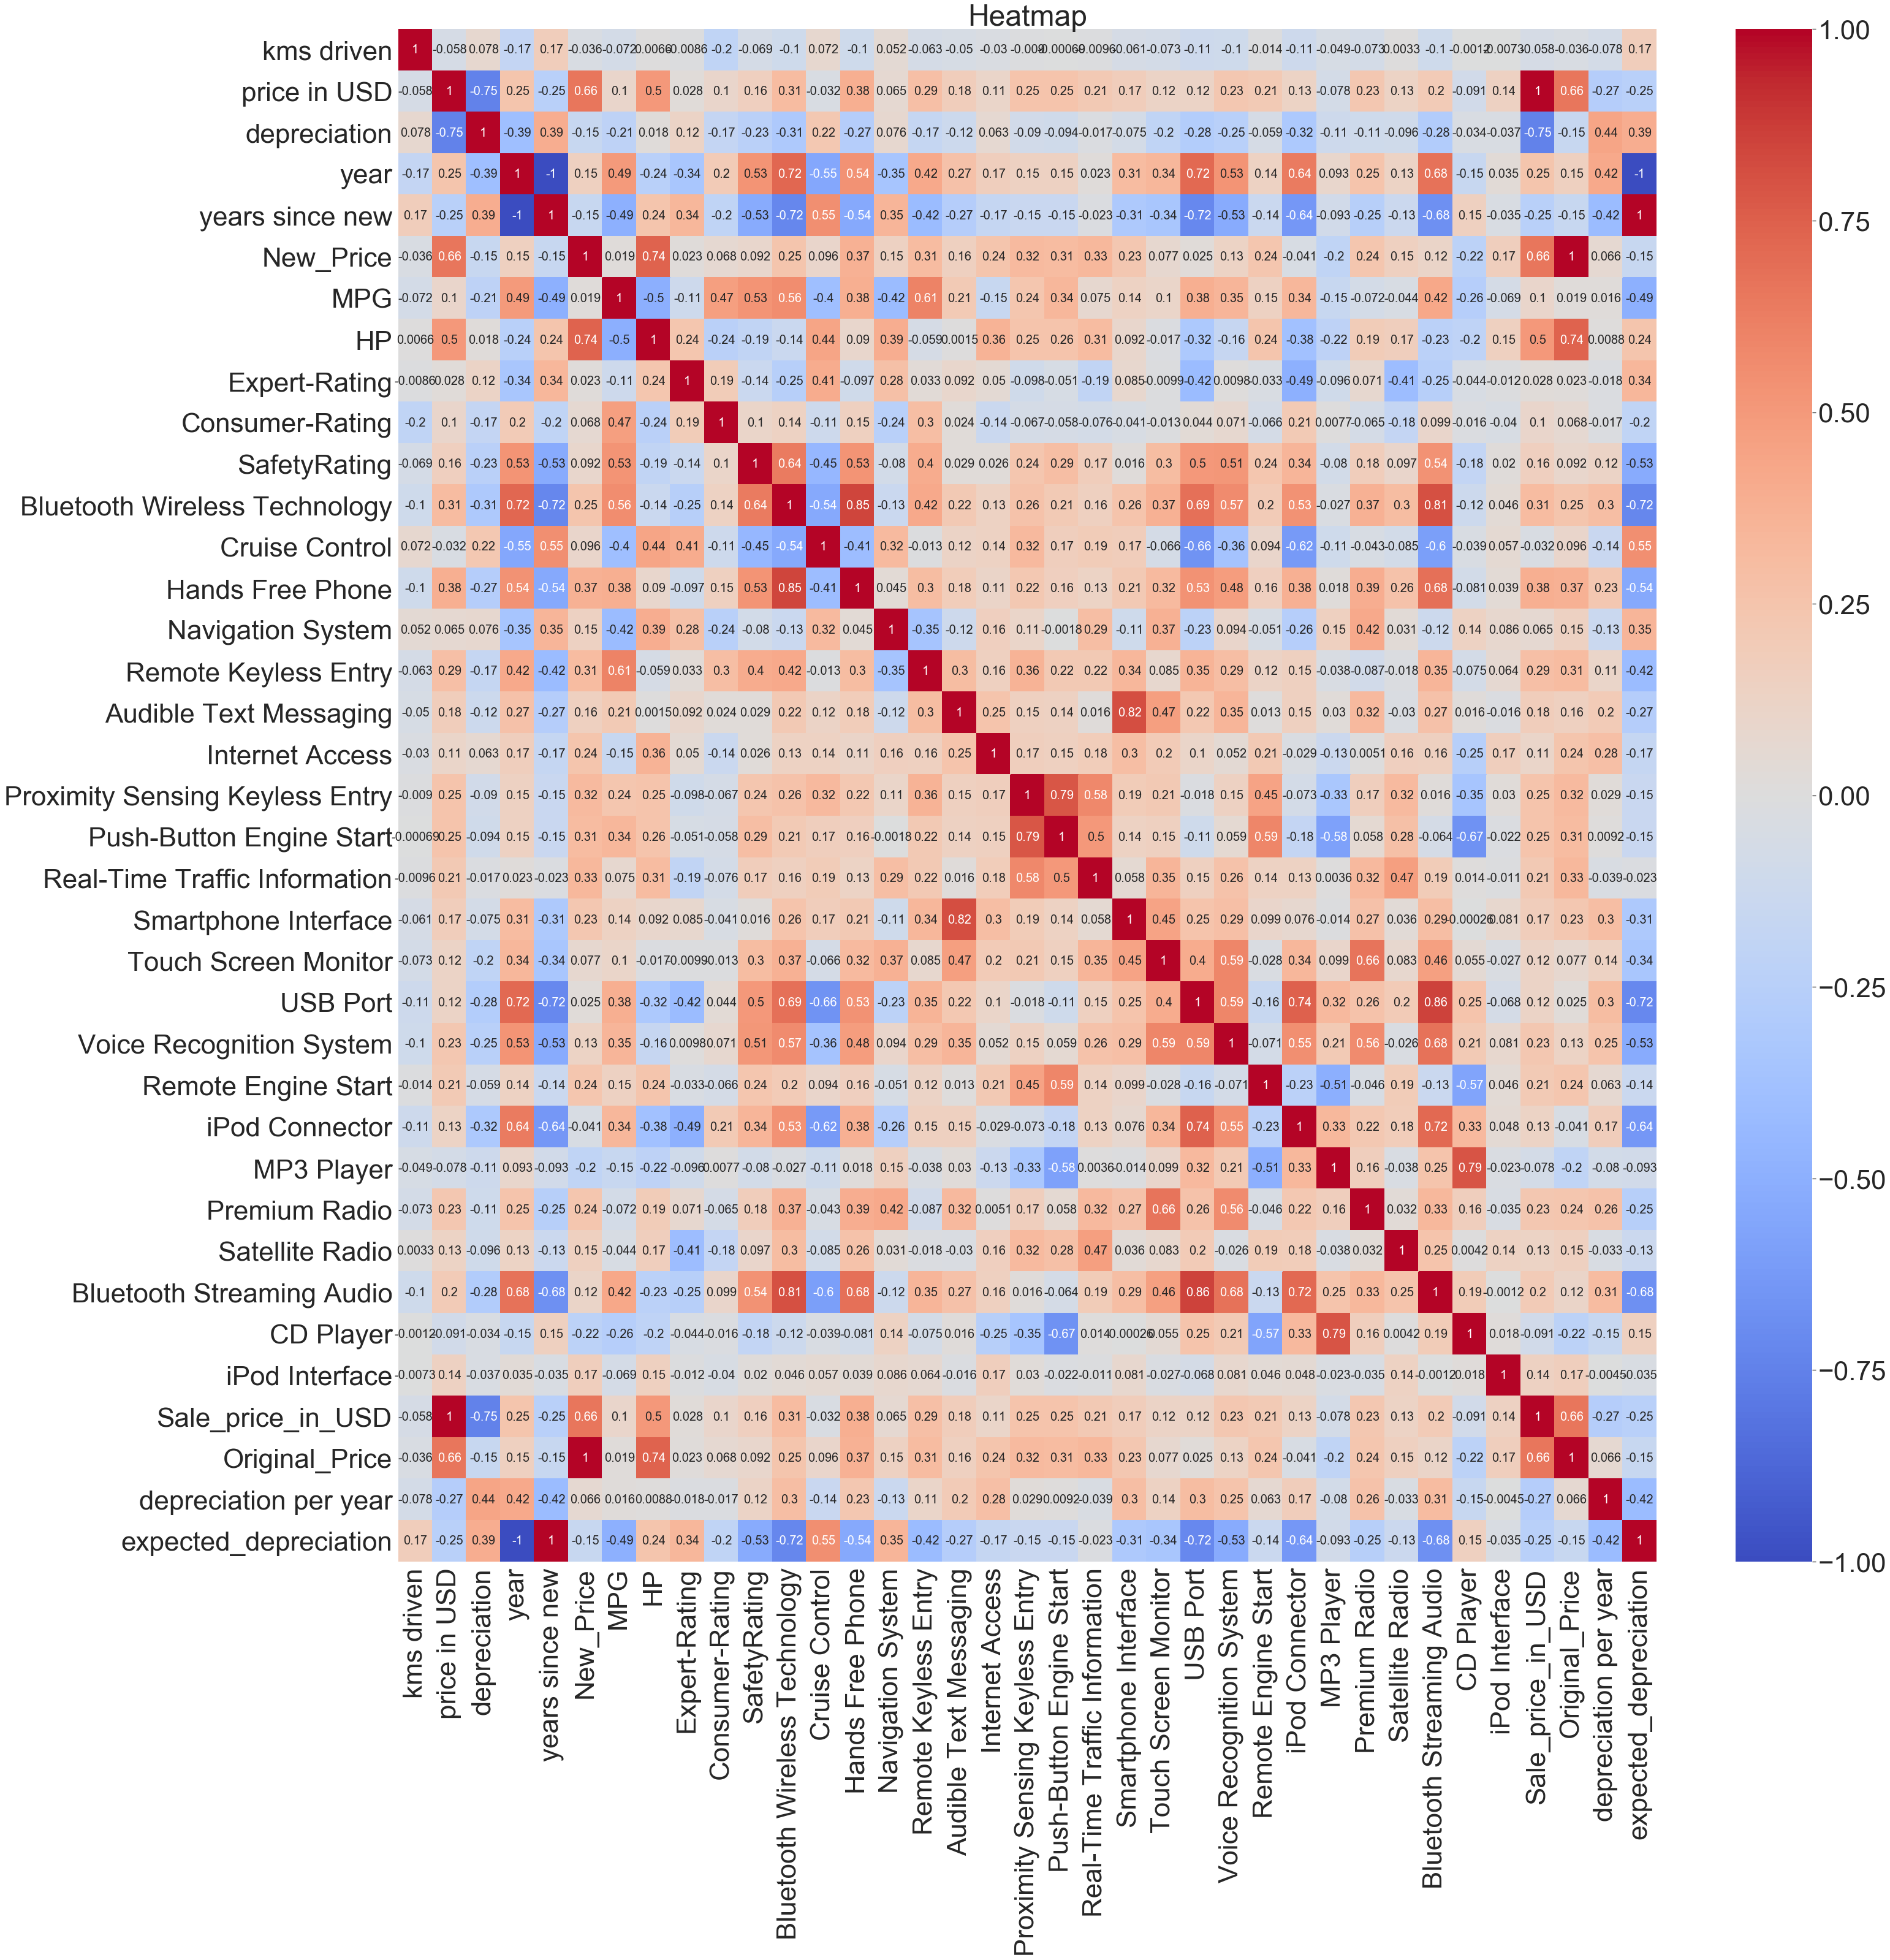

In [21]:
plt.figure(figsize=(46,46))
sns.heatmap(KBB_df.corr(), annot=True, cmap='coolwarm', annot_kws={"fontsize":20} )
plt.title('Heatmap')
sns.set(font_scale= 4) # font size 2
#depreciation and year
#depreciation and Bluetooth Wireless Technology 
#depreciation and Push-Buttion Engine Start
#depreciation and Remote Engine Start
#depreciation and Real-Time Traffic Information
#depreciation and 
#depreciation and 
#depreciation over time and across all cars 

#(6/22)expected depreciation (predict depreciation by year since new ), also make depreciation = 1- current depreciation 
# try log or expo model 
# plot the scatter 
# remove all rows where the new price is larger than the orignal price

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


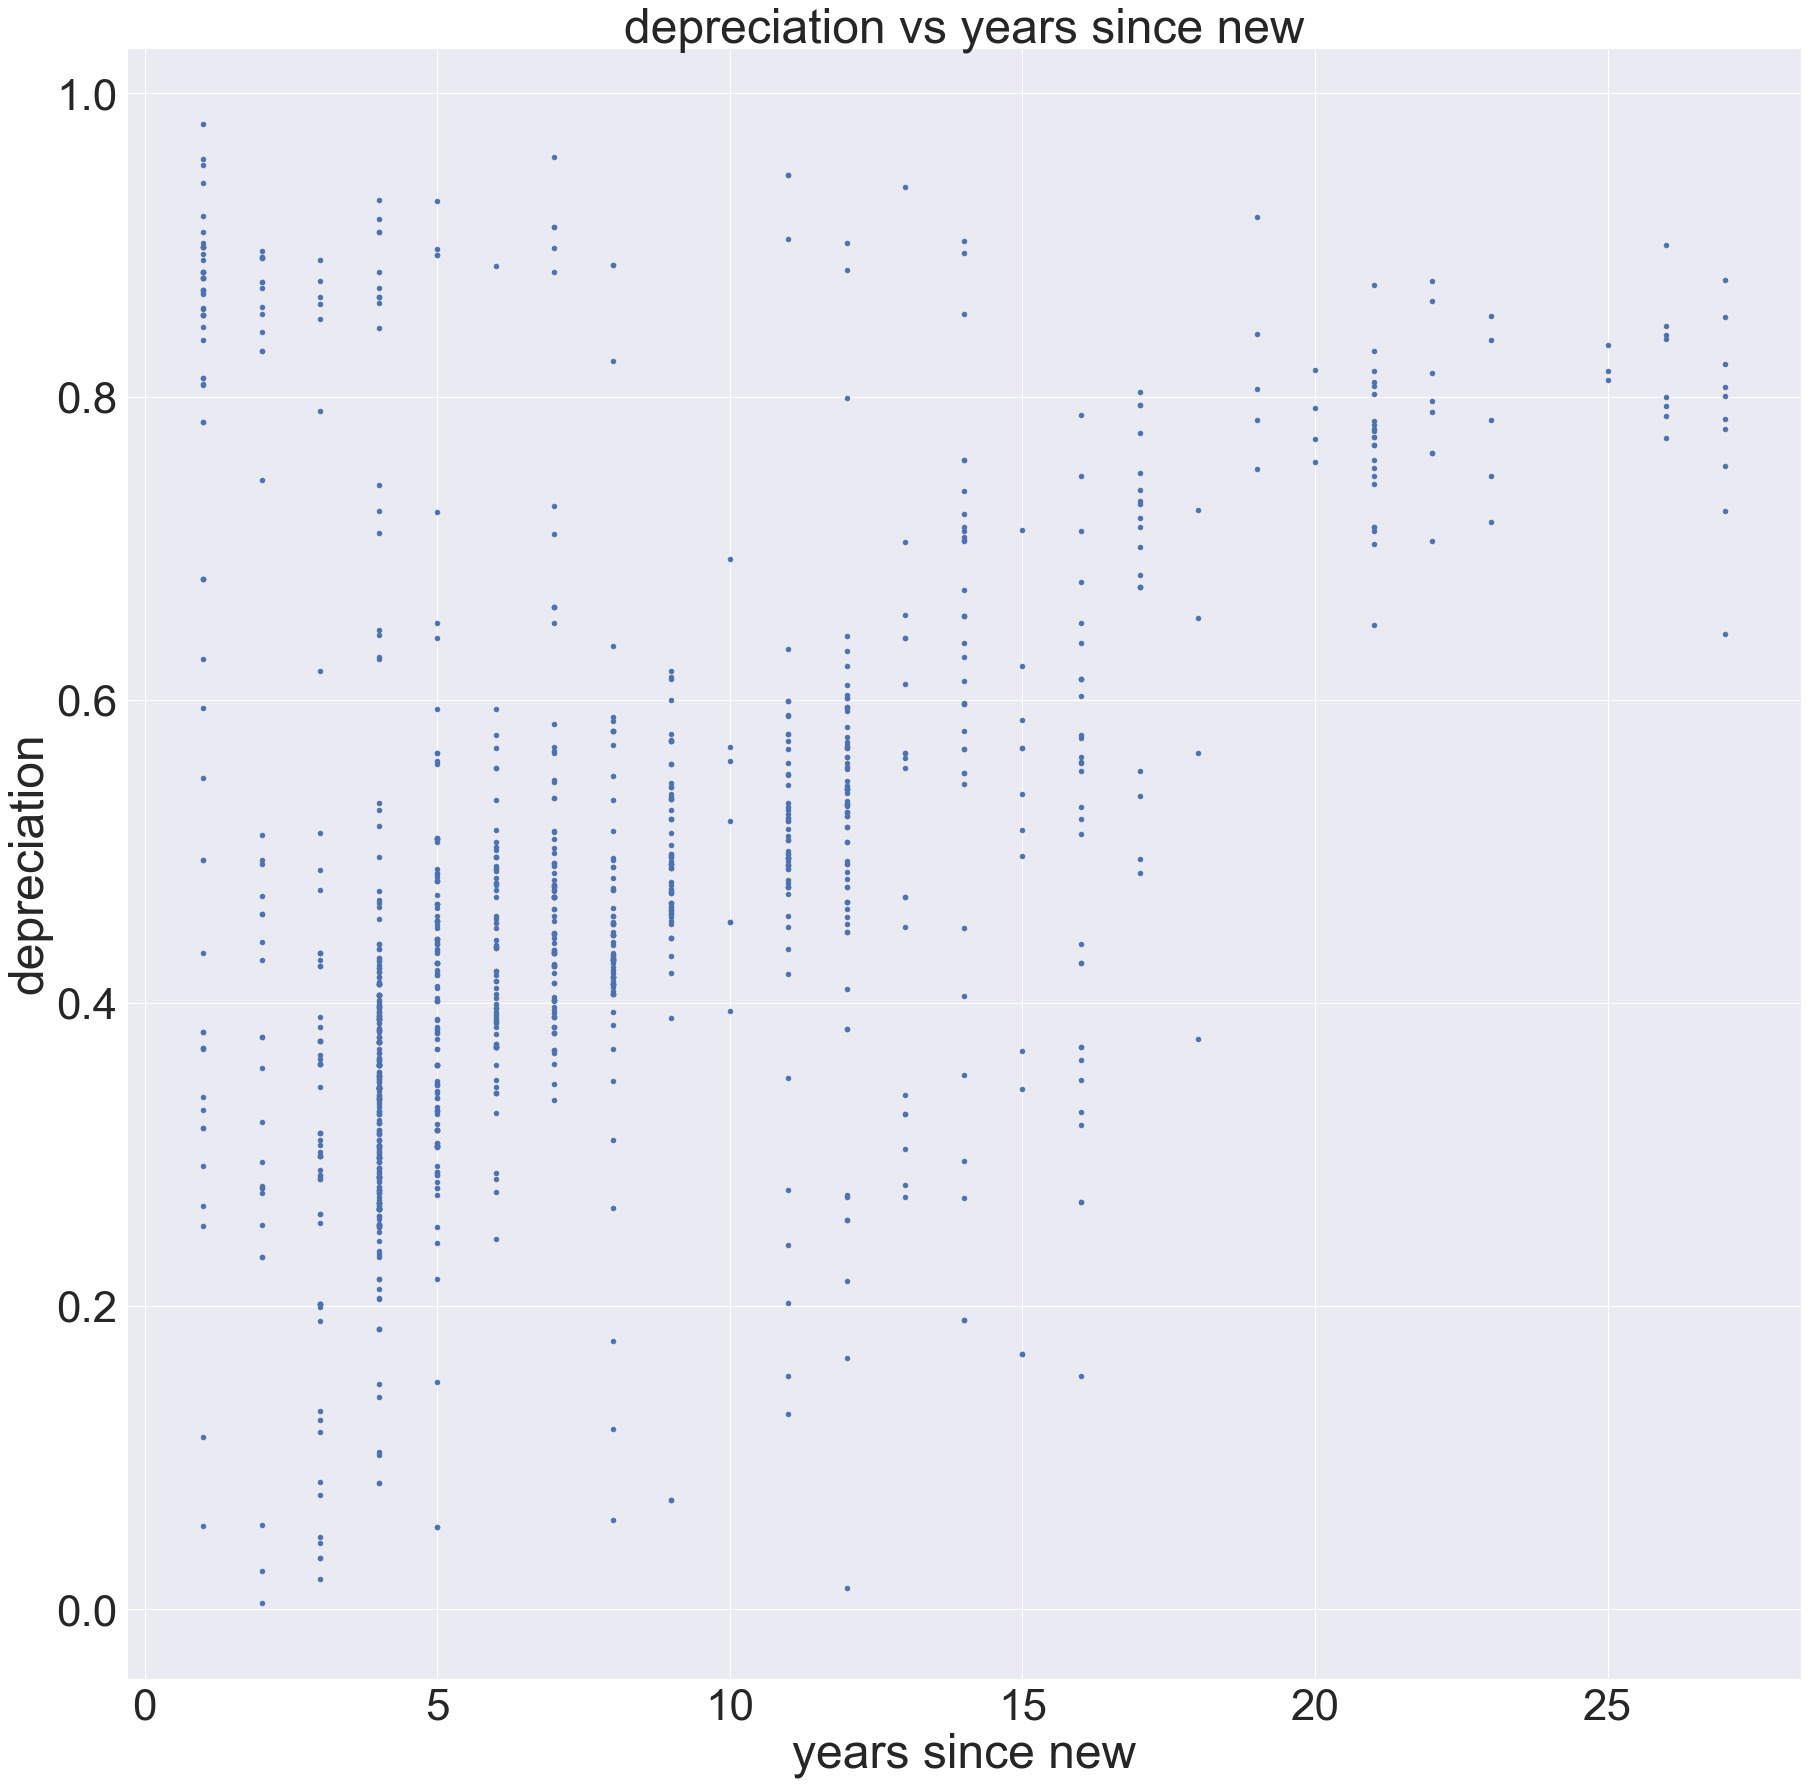

In [23]:
KBB_df.plot.scatter(x='years since new', y='depreciation') # don't touch until you figure out what is going on with the graphs
plt.title('depreciation vs years since new')
rcParams['figure.figsize'] = 30,30


In [24]:
#pearson stats
from scipy.stats.stats import pearsonr   
a = KBB_df['years since new']
b = KBB_df['depreciation']   
print (pearsonr(a,b))

#first value is the corelation is 0.3920594237547733, pvalue is 1.3061064879820902e-44, since the pvalue is less than .05
#this gives strong evidence to reject the null hypothesis, the null hypthesis being that years since new affects the depreciation.
#Years since new(how old the car is) still might affect depreciation but clearly on its own it is not significant 

(0.3920594237547733, 1.3061064879820902e-44)


(0, 60000)

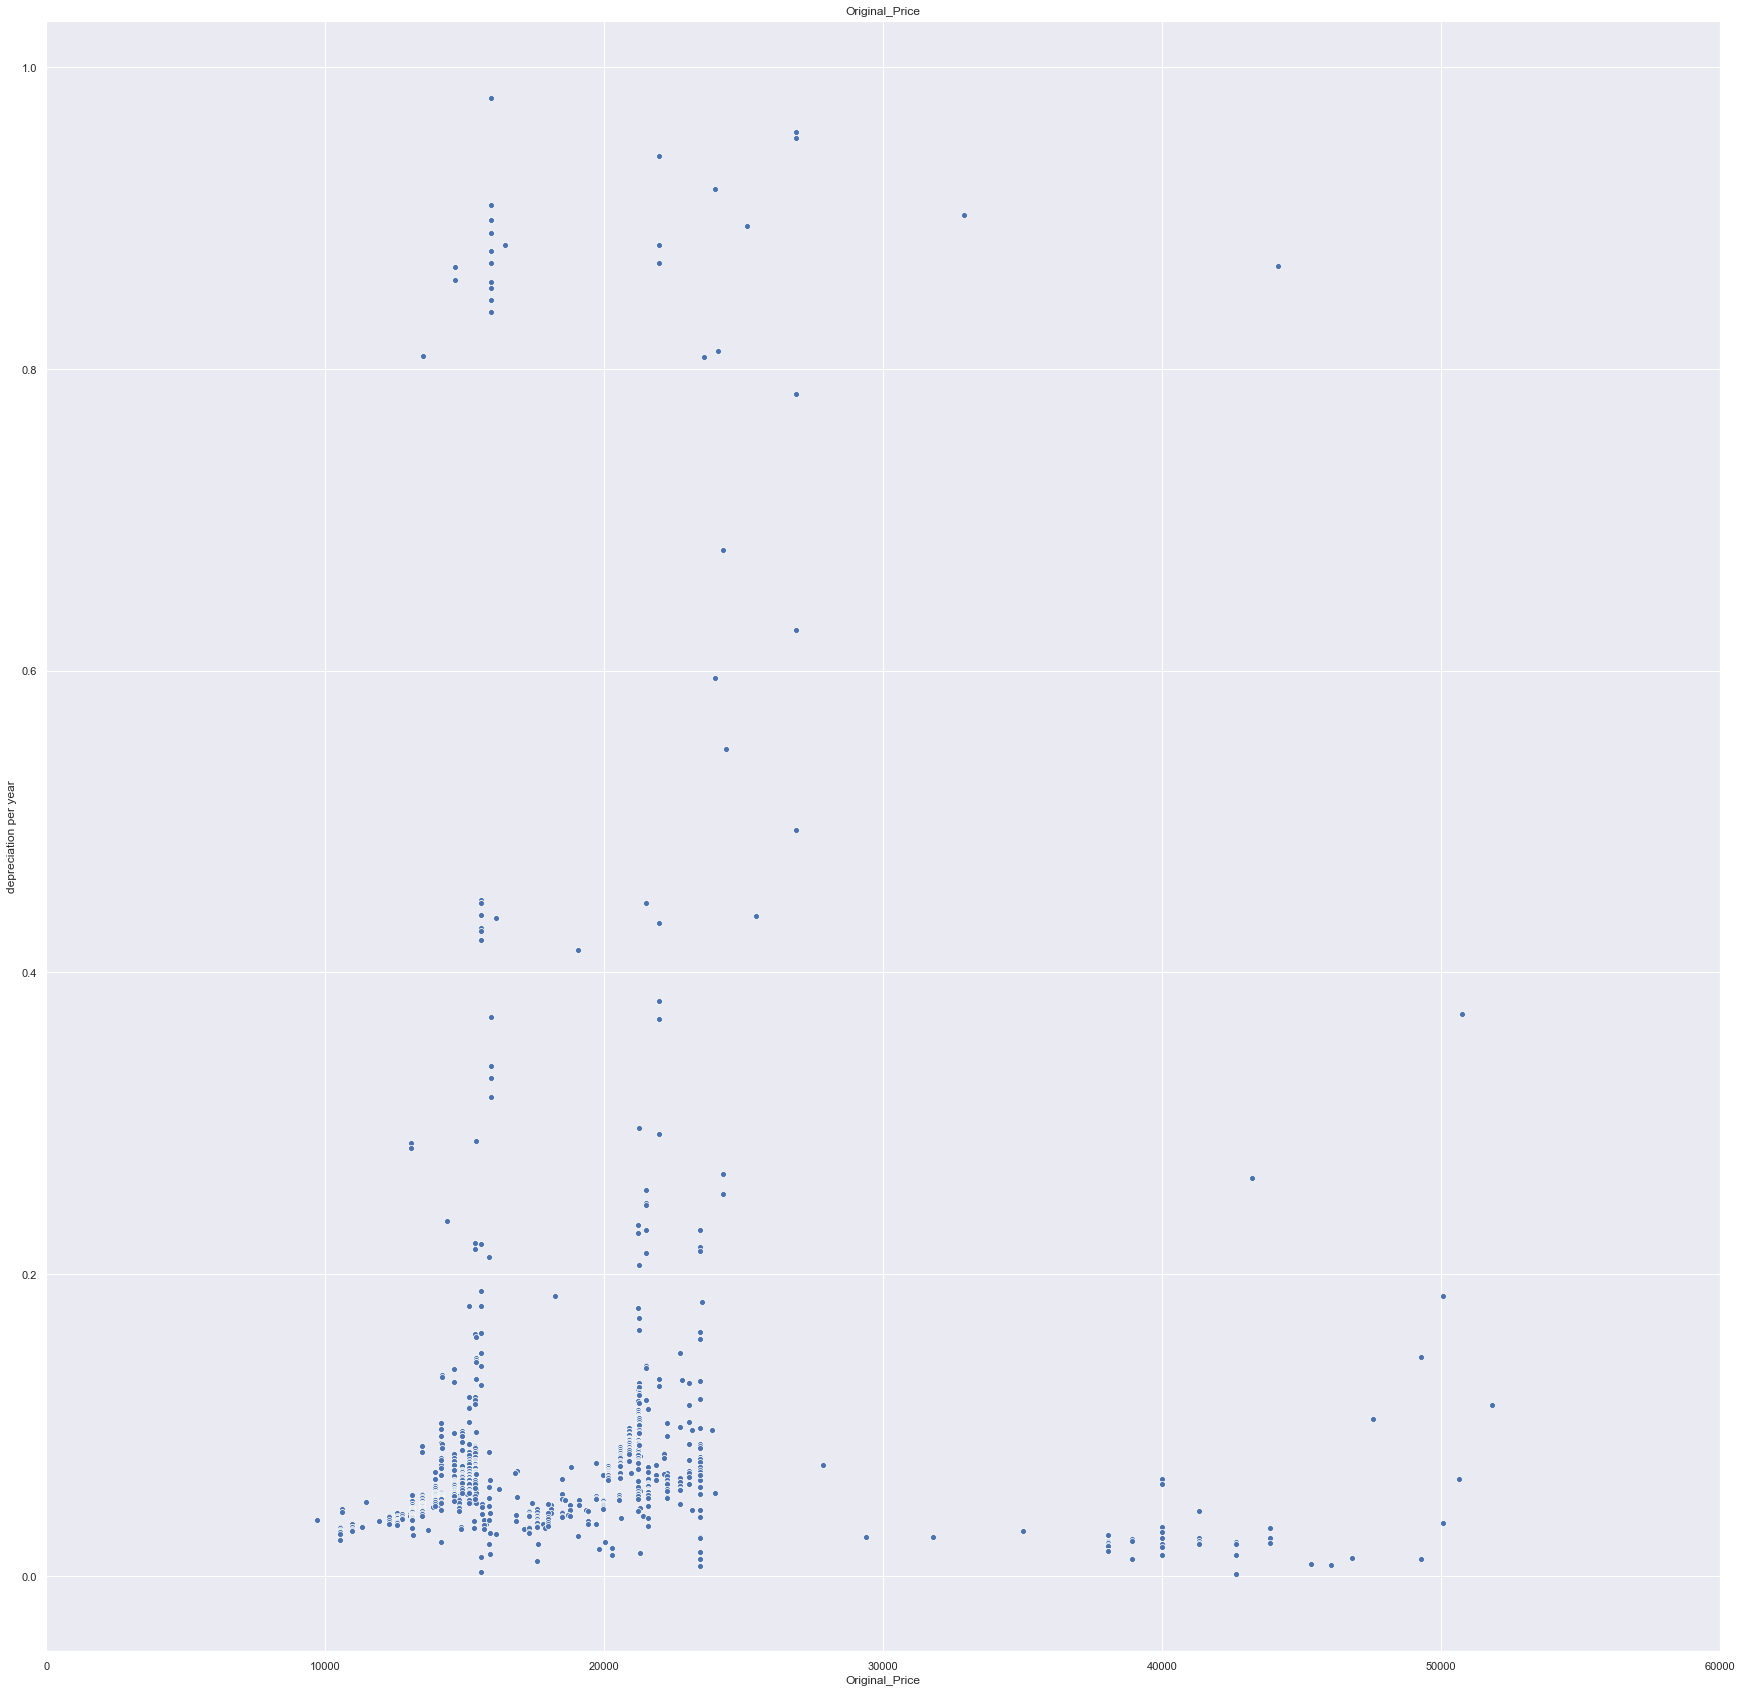

<Figure size 1440x1440 with 0 Axes>

In [25]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
#tips = sns.load_dataset("tips")
ax = sns.scatterplot(x="Original_Price", y="depreciation per year", data=KBB_df)
plt.title('Original_Price')
plt.savefig('Original_Price.png')
plt.figure(figsize=(20,20))
ax.set_xlim(0,60000)
#hypothesis the cheaper cars will depreciate at a faster rate

In [26]:
#pearson stats
#pearson
from scipy.stats.stats import pearsonr   
a = KBB_df['Sale_price_in_USD']
b = KBB_df['depreciation']   
print (pearsonr(a,b))

#first value is the corelation is -0.7476266602130743, pvalue is 1.8884558213409781e-211, since the pvalue is less than .05
#this gives strong evidence to reject the null hypothesis, the null hypthesis being that original price affects the depreciation.
#Years since new(how old the car is) still might affect depreciation but clearly on its own it is not significant 

(-0.7476266602130743, 1.8884558213409781e-211)


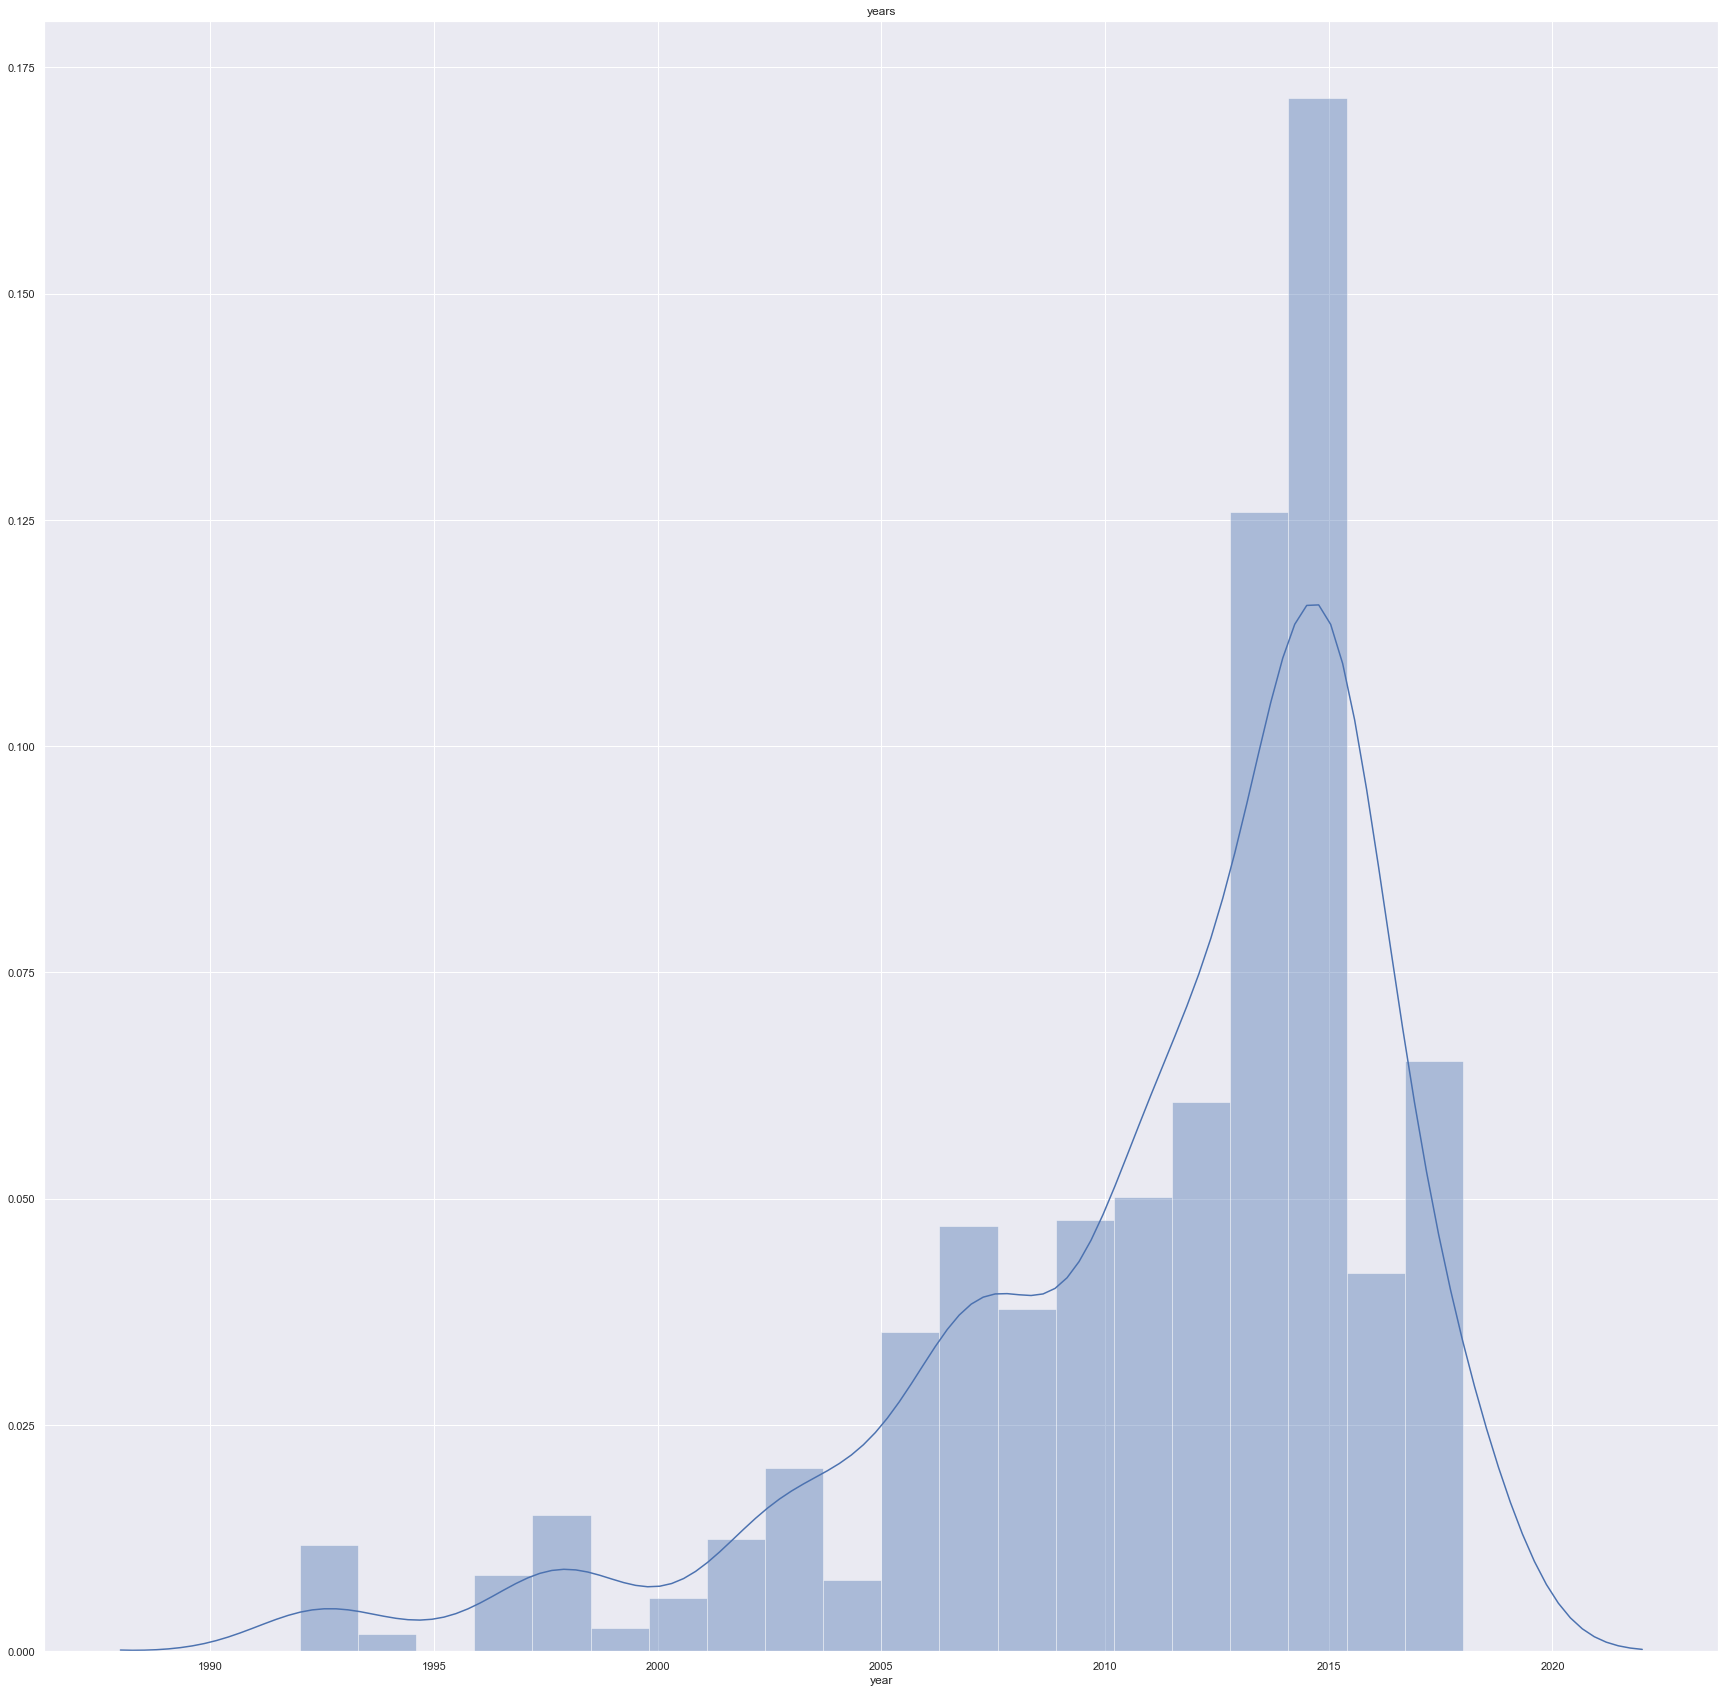

<Figure size 1440x1440 with 0 Axes>

In [27]:
sns.distplot(KBB_df['year'])
plt.title('years')
plt.show()
plt.figure(figsize=(20,20))
plt.savefig('years_1.png')
#as we can see from the graph the bulk majority, the year of the models were 2015 and later

In [28]:
mean = KBB_df["depreciation per year"].mean()
print(mean)

0.10845332075533622


In [29]:
KBB_df['model'].value_counts()

yaris       433
prius-c     276
prius       155
accord       79
sentra       68
gx           47
fit          37
camry        16
mirage       13
sportage     12
insight       9
86            7
accent        4
spark         3
a3            3
rav4          3
cr-v          3
a5            2
q7            2
elantra       2
sonata        2
a4            2
i8            1
Name: model, dtype: int64

In [30]:
KBB_df2 = KBB_df[KBB_df['model'].isin(['yaris', 'prius-c', 'prius', 'accord', 'sentra', 'gx', 'fit'])]

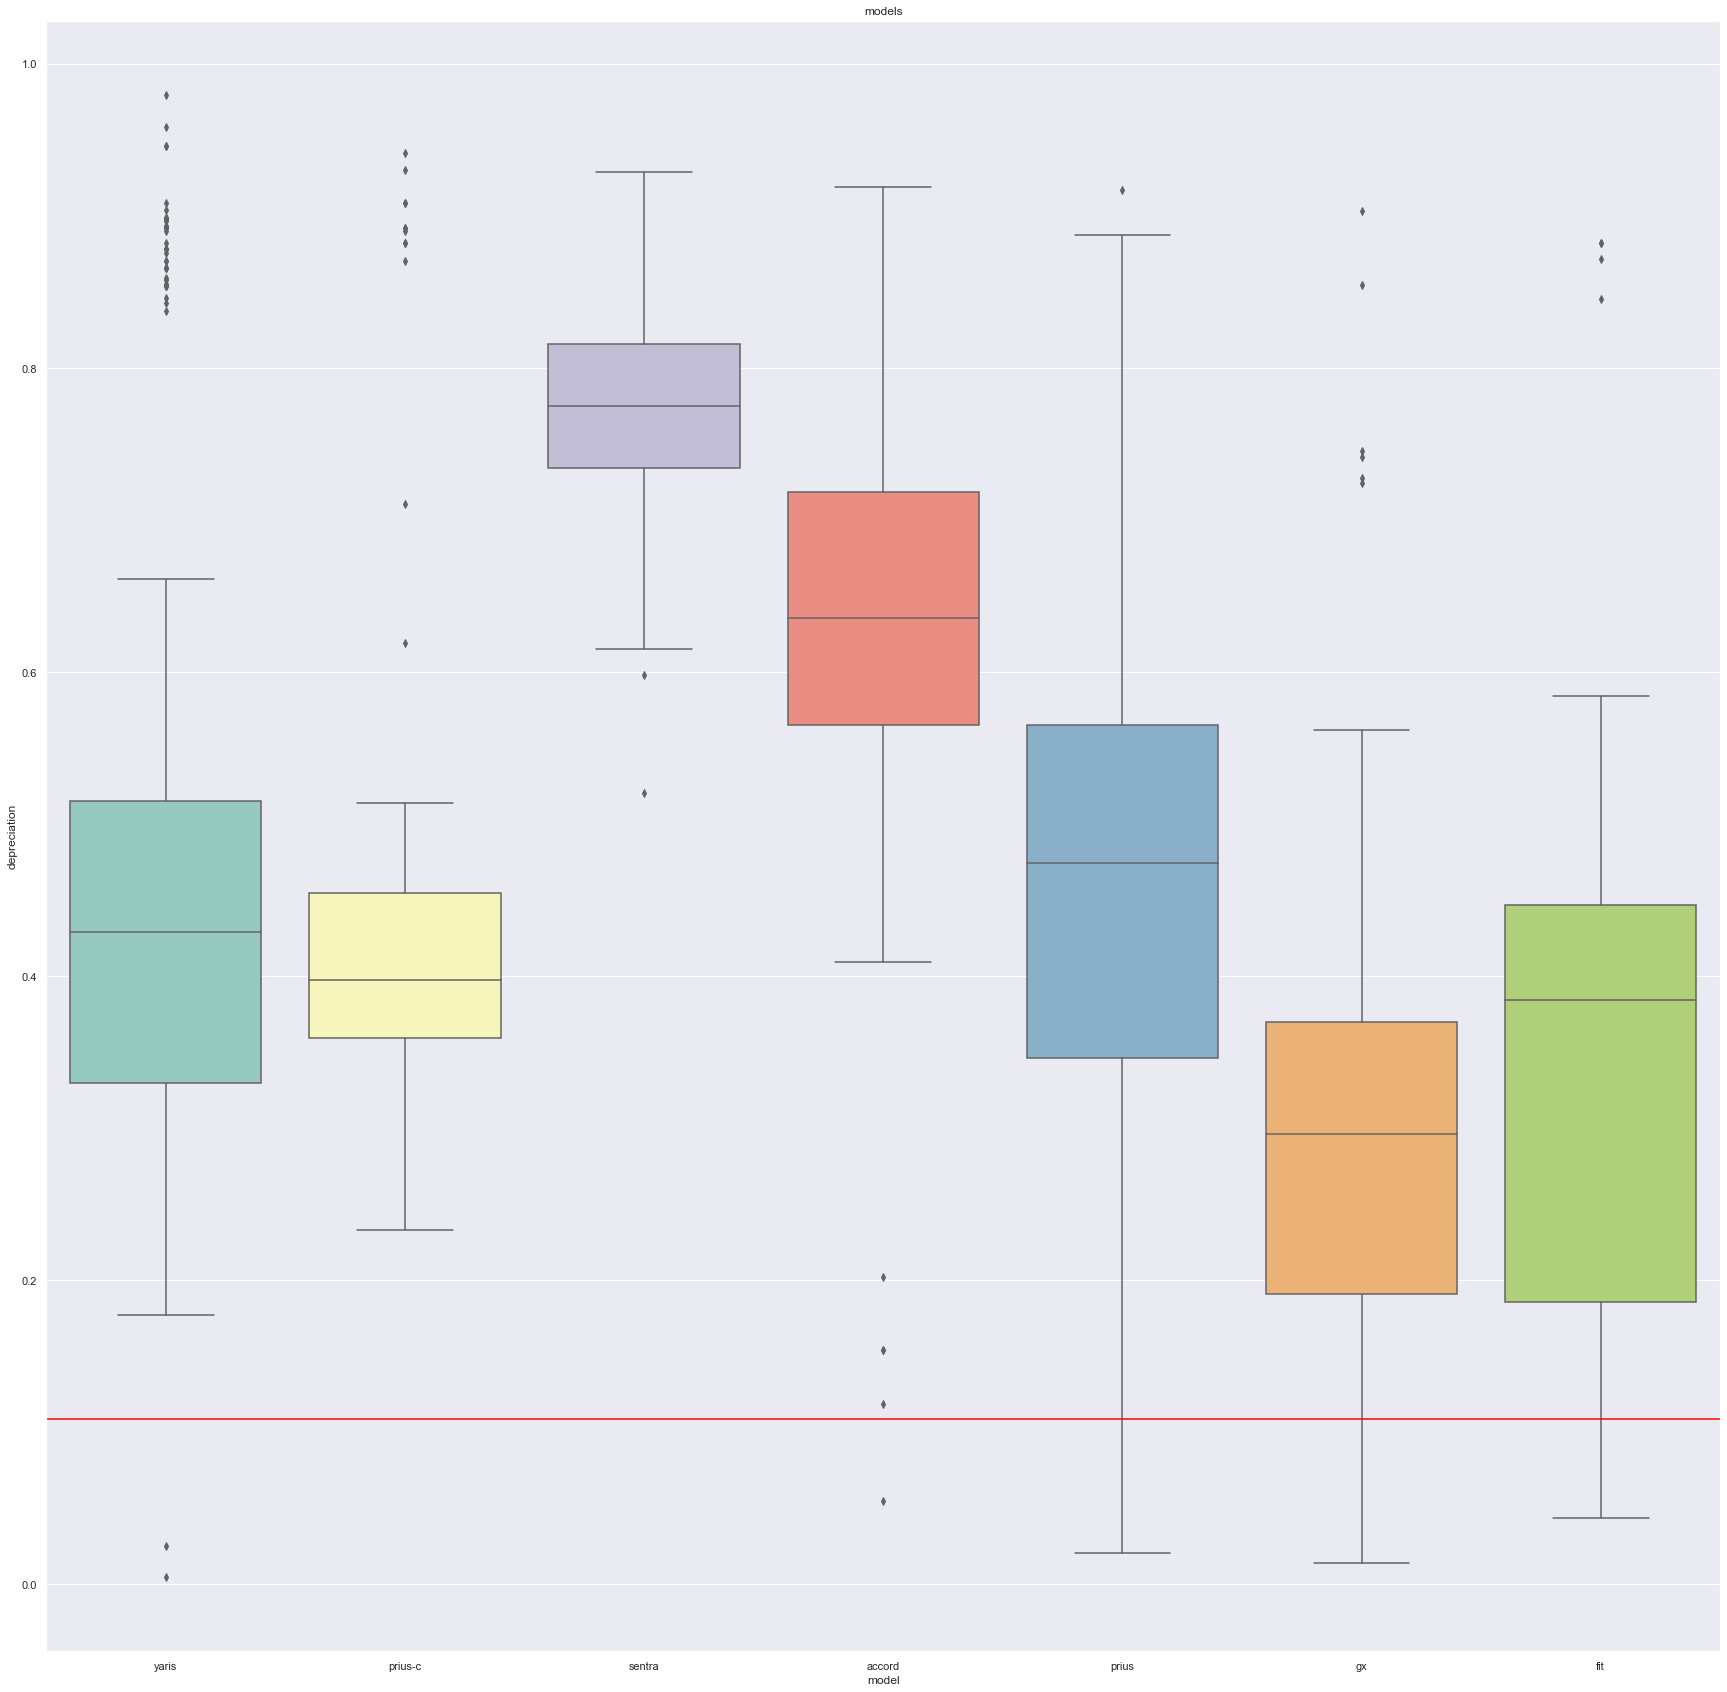

In [31]:
import matplotlib.pyplot as plt
ax = sns.boxplot(x="model", y="depreciation",
                 data=KBB_df2, palette="Set3")
plt.axhline(0.10845332075533622, 0, color="Red")
plt.title('models')
rcParams['figure.figsize'] = 30,30
plt.savefig('model')


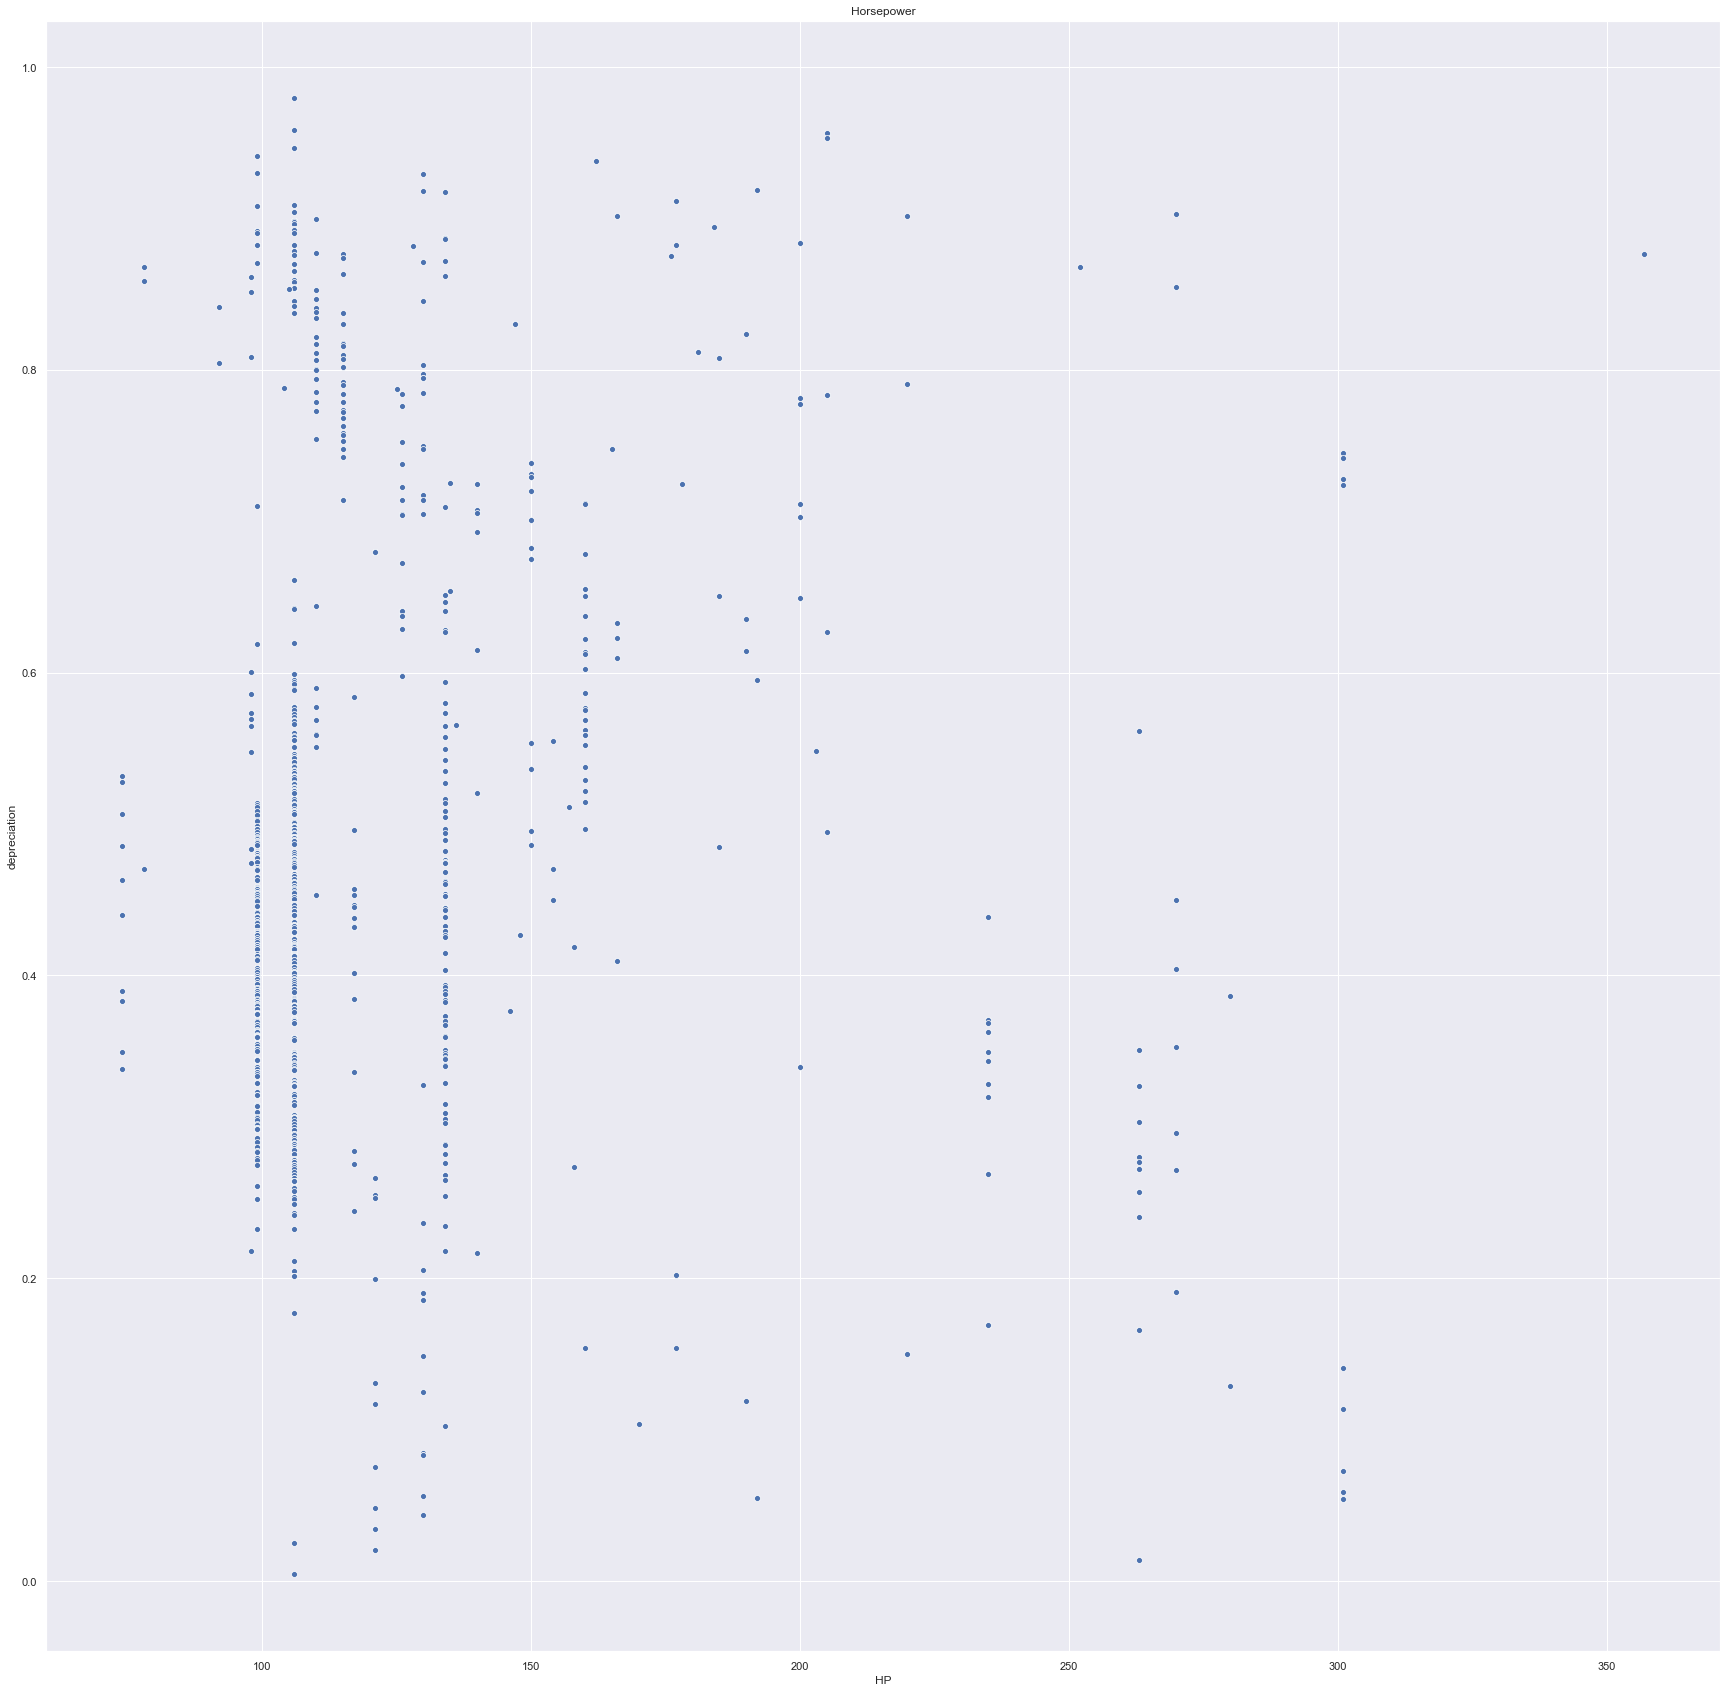

In [32]:
#add horsepower vs depreciation
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
#tips = sns.load_dataset("tips")
ax = sns.scatterplot(x="HP", y="depreciation", data=KBB_df)
plt.title('Horsepower')
plt.savefig('scatter_1.png')
#hypothesis the cheaper cars will depreciate at a faster rate 

In [33]:
KBB_df = KBB_df.fillna(0)

In [34]:
#pearson
from scipy.stats.stats import pearsonr   
a = KBB_df['HP']
b = KBB_df['depreciation']   
print (pearsonr(a,b))

#first value is the corelation is -0.03497611363371208, pvalue is 0.23011874876637908, since the pvalue is less than

(-0.03497611363371208, 0.23011874876637908)


In [35]:
KBB_df['HP_b'] = KBB_df['HP']

In [36]:
KBB_df['MPG'].value_counts()

50.0    367
32.0    268
31.0    176
25.0     41
29.0     35
27.0     31
46.0     30
28.0     26
16.0     23
23.0     21
47.0     19
15.0     16
24.0     15
36.0     15
37.0     10
52.0      9
30.0      9
21.0      9
17.0      9
18.0      8
42.0      7
35.0      6
33.0      6
0.0       6
26.0      5
22.0      3
34.0      3
41.0      3
39.0      2
20.0      1
Name: MPG, dtype: int64

In [40]:
KBB_df.fillna(0, inplace= True)

In [41]:
KBB_df['MPG'] = KBB_df['MPG'].astype(float)

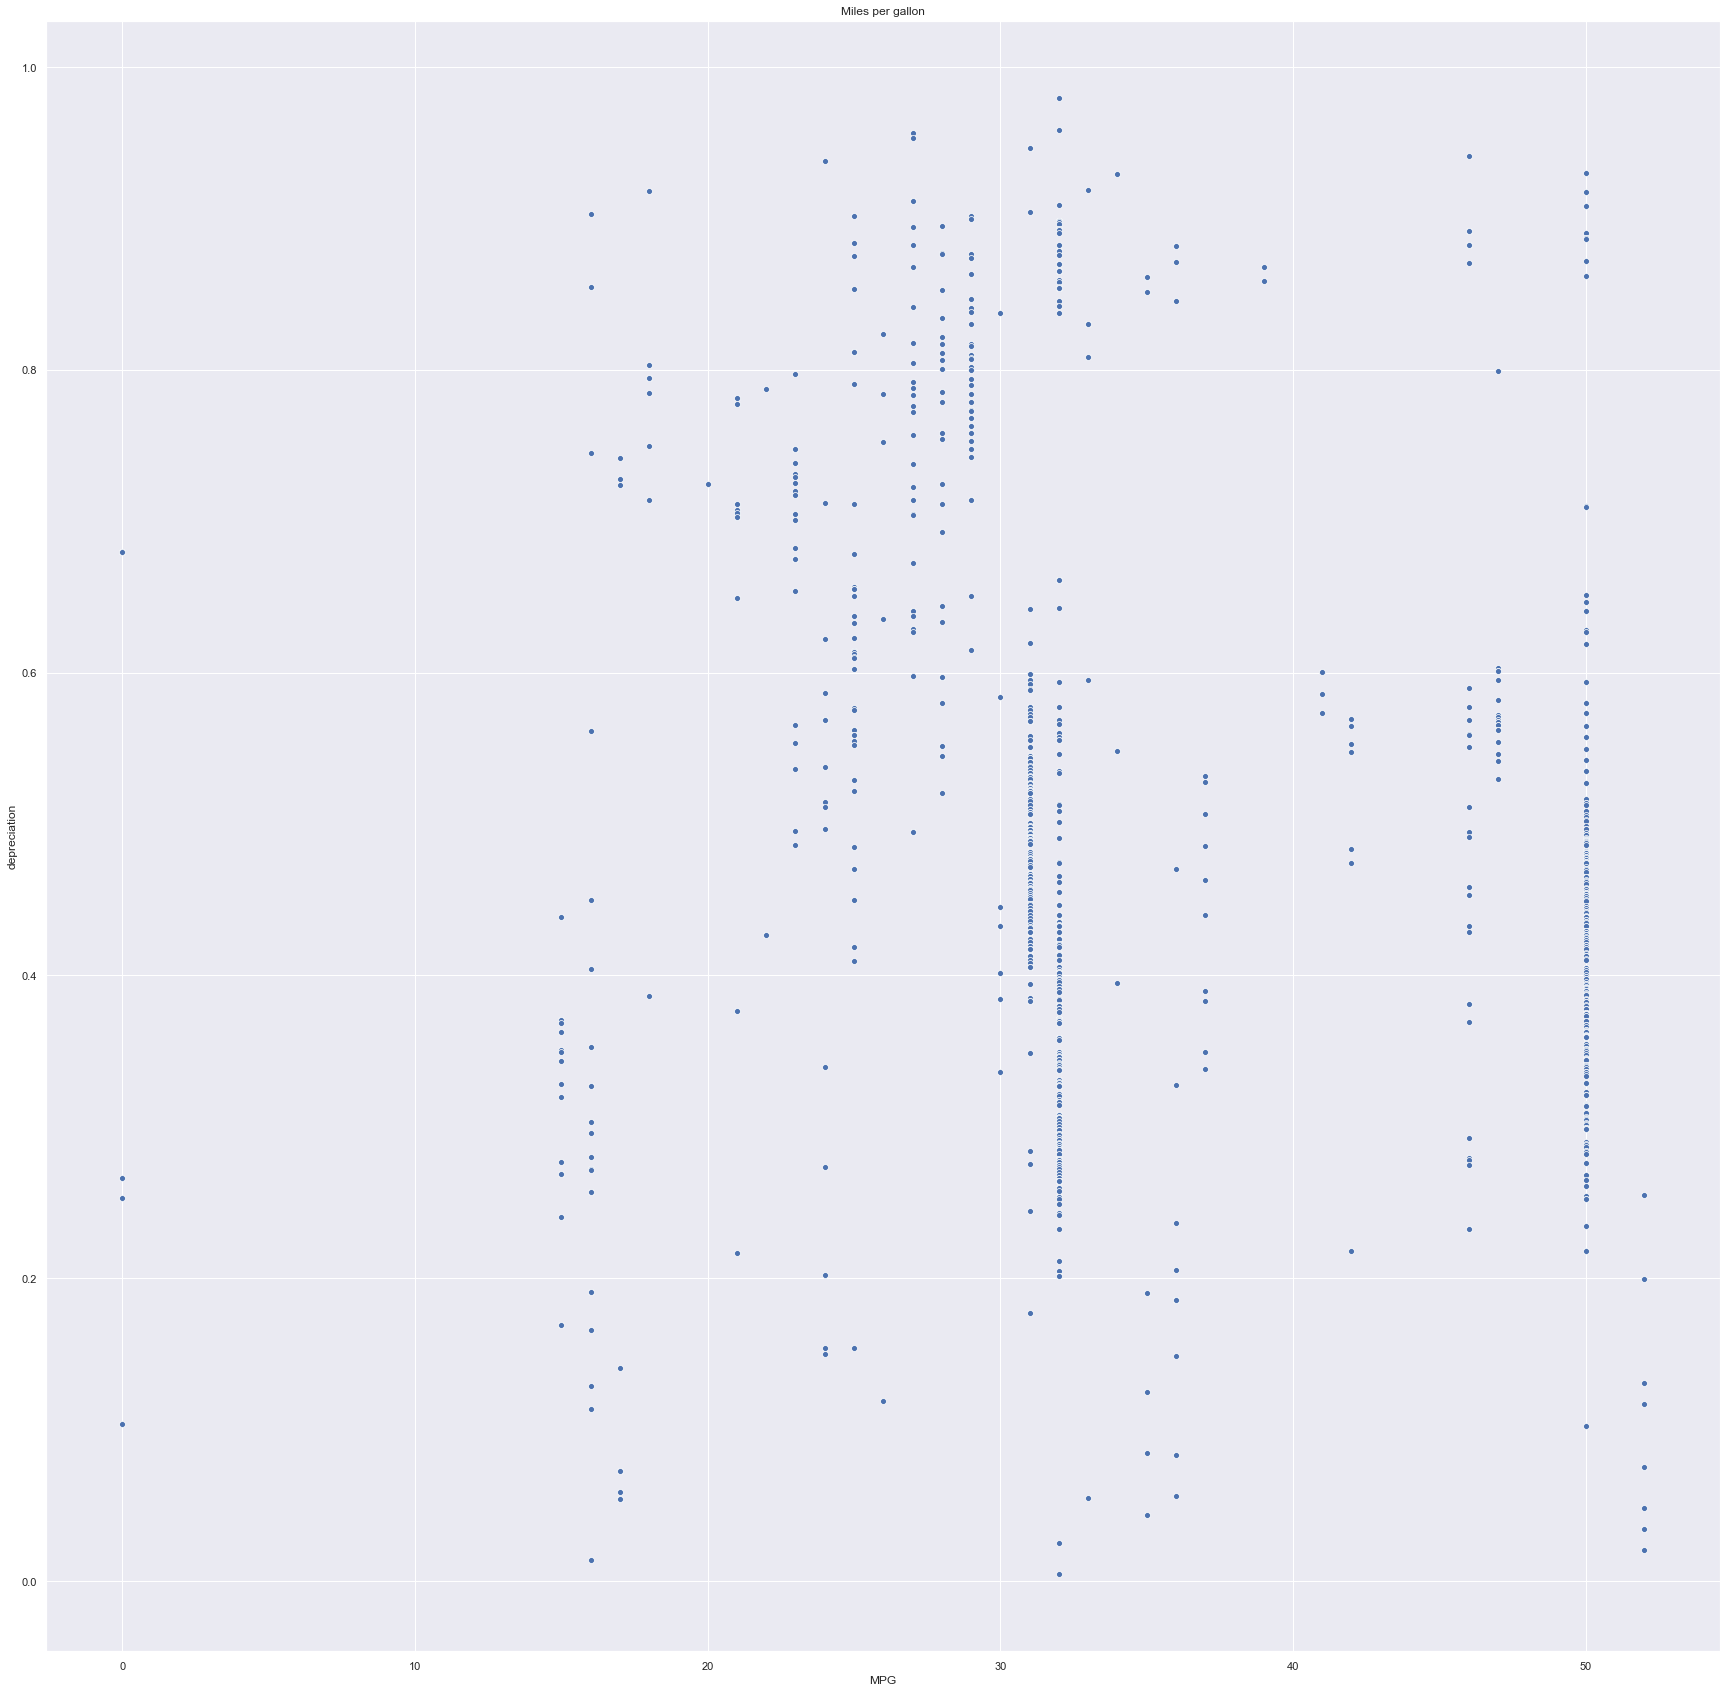

In [42]:
#add mpg vs depreciation
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
#tips = sns.load_dataset("tips")
ax = sns.scatterplot(x="MPG", y="depreciation", data=KBB_df)
plt.title('Miles per gallon')
plt.savefig('scatter_3.png')
#hypothesis the cheaper cars will depreciate at a faster rate 
#order the x axis # convert mpg into an int or float 

In [43]:
from scipy.stats.stats import pearsonr   
a = KBB_df['MPG']
b = KBB_df['depreciation']   
print (pearsonr(a,b))

#first value is the corelation is -0.20340775426076624, pvalue is 1.7795338384446617e-12, since the pvalue is less than .05
#this gives strong evidence to reject the null hypothesis, the null hypthesis being cars with a higher MPG will depreciate slower 
#MPG still might affect depreciation but clearly on its own it is not significant 

(-0.20340775426076624, 1.7795338384446617e-12)


In [44]:
KBB_df['MPG_b'] = KBB_df['MPG']

In [45]:
KBB_df.MPG[KBB_df.MPG <= (25)] = 0
KBB_df.MPG[KBB_df.MPG > (25)] = 1

C:\Users\adame\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\adame\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [46]:
KBB_df['numfeat'] = KBB_df['Audible Text Messaging']+KBB_df['Bluetooth Wireless Technology']+KBB_df['Hands Free Phone']+KBB_df['Internet Access']+KBB_df['Smartphone Interface']+KBB_df['USB Port']+KBB_df['Voice Recognition System']+KBB_df['Premium Radio']+KBB_df['Bluetooth Streaming Audio']

In [47]:
KBB_df['numfeat_b'] = KBB_df['numfeat']

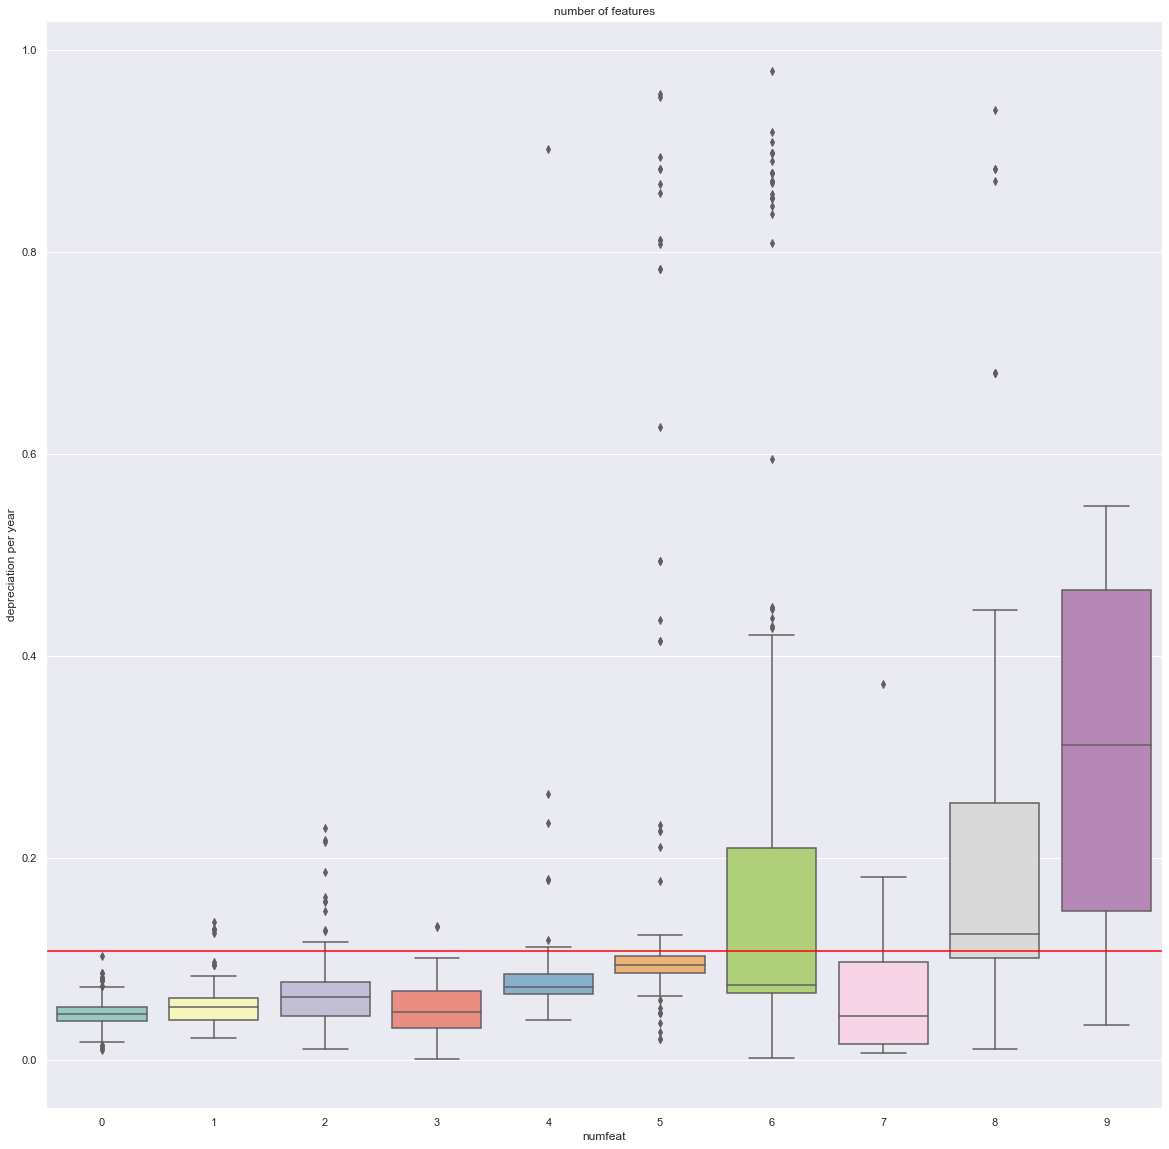

In [48]:
plt.figure(figsize=(20,20))
ax = sns.boxplot(x="numfeat", y="depreciation per year", 
                 data=KBB_df, palette="Set3")
plt.title('number of features')
plt.axhline(0.10845332075533622, 0, color="Red")
#plt.savefig('Bluetooth Wireless Technology.png')
#null hypothesis is that the cars with more features will depreciate at a slower rate

In [49]:
KBB_df.numfeat[KBB_df.numfeat <= (4)] = 0
KBB_df.numfeat[KBB_df.numfeat > (4)] = 1



C:\Users\adame\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\adame\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [50]:
grouped9 = KBB_df.groupby('numfeat')
n0 = grouped9.count().loc[0][0]
n1 = grouped9.count().loc[1][0]

In [51]:
# Calculate the mean
x0 = grouped9.mean().loc[0,'depreciation per year']
x1 = grouped9.mean().loc[1,'depreciation per year']

# Calculate the standard deviation
s0 = grouped9.std().loc[0,'depreciation per year']
s1 = grouped9.std().loc[1,'depreciation per year']



In [52]:
# t test from inf stats part a and b ,variables are  depreciation per year and 
#Separated the data into two groups, 0 and 1 , and the variable is depreciation per year

std_pool = np.sqrt(((n0-1) * (s0 ** 2) + (n1-1) * (s1 ** 2)) / (n0 + n1 - 2))

std_pool
print("The pooled standard deviation is: {} ".format(std_pool))


The pooled standard deviation is: 0.14910482649495438 


In [53]:
t_critical = (x0 - x1) / ((std_pool) * np.sqrt((1/n0) + (1/n1)))
print("The t critical value is: {} ".format(t_critical))


The t critical value is: -14.71789558550809 


In [54]:
# Calculating the p-value using the t-statistic from above
from scipy.stats import t, ttest_ind_from_stats
p_value = t.cdf(t_critical, n0+n1-2)
p_value
print("P-value given that the null hypothesis is true is: {}".format(p_value))


P-value given that the null hypothesis is true is: 1.9557526573025715e-45


In [55]:
t_critical_stats, p_value_stats = ttest_ind_from_stats(x0, s0, n0, x1, s1, n1)
print("Using the scipy.stats function gives us t critical value of: {} and P-value of {}".format(t_critical_stats, p_value_stats))

Using the scipy.stats function gives us t critical value of: -14.71789558550809 and P-value of 3.911505314605143e-45


the pvalue is below .05 so we can reason that the null hypothesis is not statistically significant, 
The null hypothesis was that cars more than 4 features would deprecieate slower 

In [56]:
KBB_df['Bluetooth Wireless Technology_b'] = KBB_df['Bluetooth Wireless Technology']

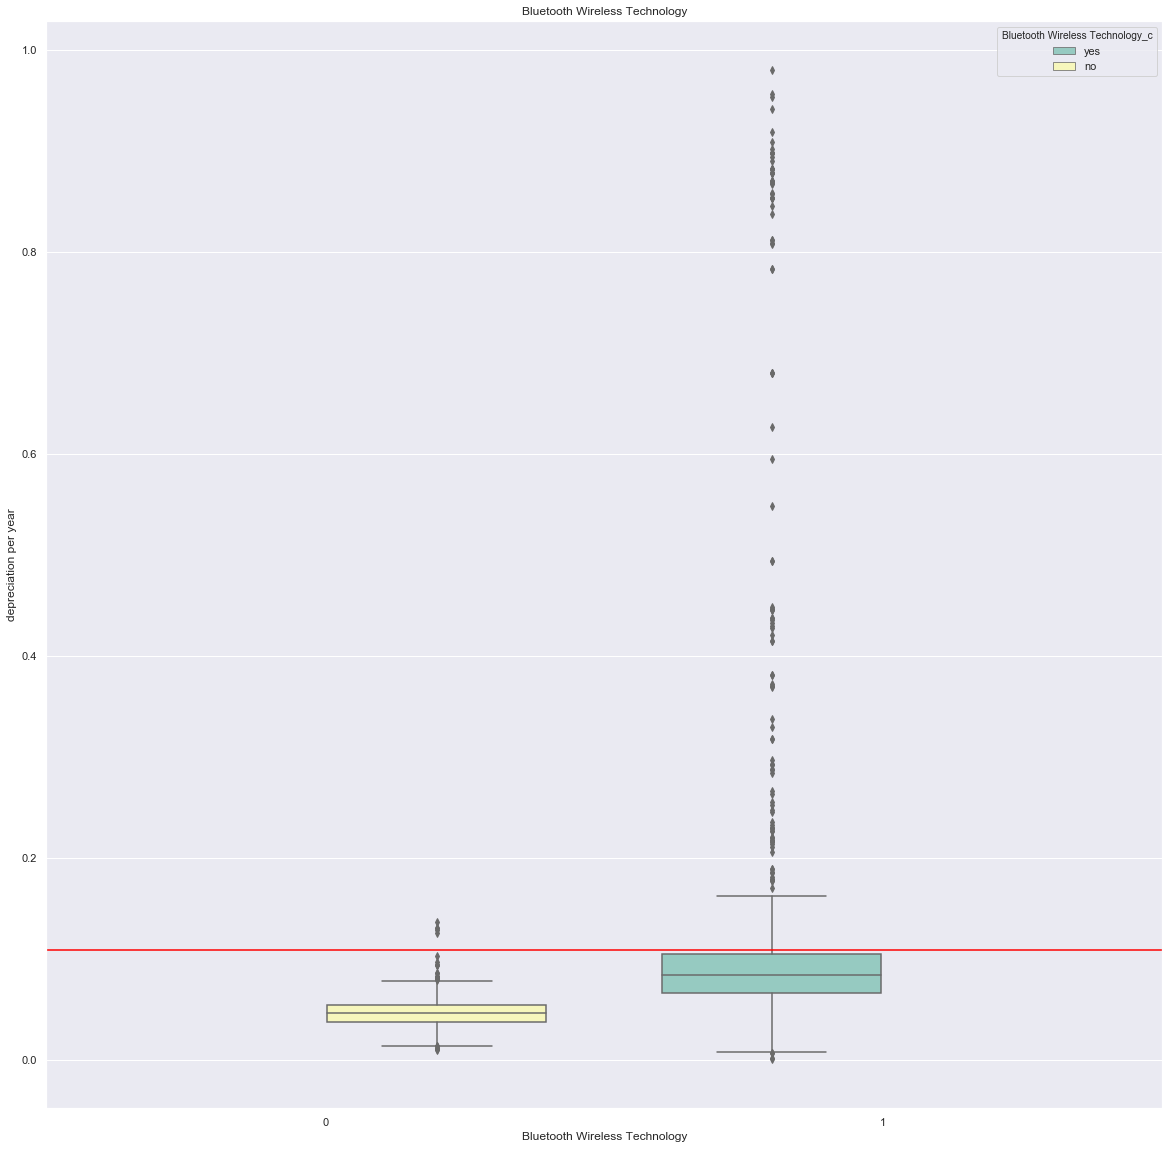

In [57]:
KBB_df['Bluetooth Wireless Technology_c'] = KBB_df['Bluetooth Wireless Technology']

KBB_df['Bluetooth Wireless Technology_c'] = KBB_df['Bluetooth Wireless Technology_c'].astype(str)

KBB_df["Bluetooth Wireless Technology_c"].replace({"0": "no", "1": "yes"}, inplace=True)

plt.figure(figsize=(20,20))
ax = sns.boxplot(x="Bluetooth Wireless Technology", y="depreciation per year", hue="Bluetooth Wireless Technology_c",
                 data=KBB_df, palette="Set3")
plt.title('Bluetooth Wireless Technology')
plt.axhline(0.10845332075533622, 0, color="Red")
plt.savefig('Bluetooth Wireless Technology_2.png')

In [58]:
grouped4 = KBB_df.groupby('Bluetooth Wireless Technology_b')
n0 = grouped4.count().loc[0][0]
n1 = grouped4.count().loc[1][0]

# Calculate the mean
x0 = grouped4.mean().loc[0,'depreciation per year']
x1 = grouped4.mean().loc[1,'depreciation per year']


# Calculate the standard deviation
s0 = grouped4.std().loc[0,'depreciation per year']
s1 = grouped4.std().loc[1,'depreciation per year']


# t test from inf stats part a and b ,variables are  depreciation per year and 
#Separated the data into two groups, 0 and 1 , and the variable is depreciation per year

In [59]:
std_pool = np.sqrt(((n0-1) * (s0 ** 2) + (n1-1) * (s1 ** 2)) / (n0 + n1 - 2))

std_pool
print("The pooled standard deviation is: {} ".format(std_pool))

The pooled standard deviation is: 0.15495180754804078 


In [60]:
t_critical = (x0 - x1) / ((std_pool) * np.sqrt((1/n0) + (1/n1)))
print("The t critical value is: {} ".format(t_critical))

The t critical value is: -10.650201883687256 


In [61]:
# Calculating the p-value using the t-statistic from above
from scipy.stats import t, ttest_ind_from_stats
p_value = t.cdf(t_critical, n0+n1-2)
p_value
print("P-value given that the null hypothesis is true is: {}".format(p_value))

P-value given that the null hypothesis is true is: 1.1886508850948396e-25


In [62]:
t_critical_stats, p_value_stats = ttest_ind_from_stats(x0, s0, n0, x1, s1, n1)
print("Using the scipy.stats function gives us t critical value of: {} and P-value of {}".format(t_critical_stats, p_value_stats))

Using the scipy.stats function gives us t critical value of: -10.650201883687256 and P-value of 2.377301770189679e-25


the pvalue is below .05 so we can reason that the null hypothesis is not statistically significant , 
The null hypothesis was that cars with bluetooth wireless would deprecieate slower 

In [63]:
KBB_df['Audible Text Messaging_b'] = KBB_df['Audible Text Messaging']

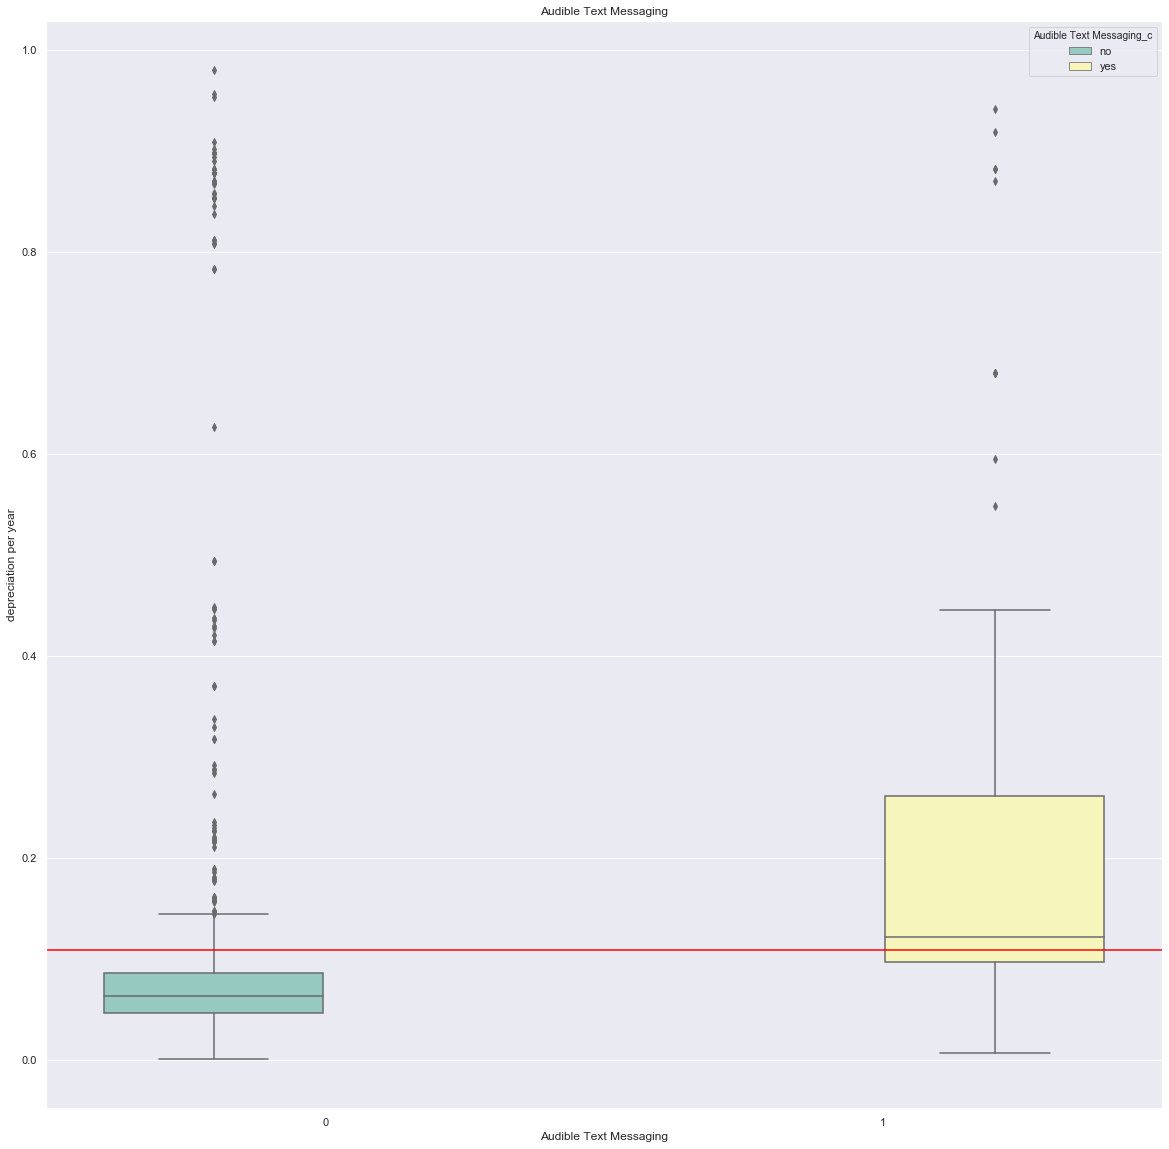

In [64]:
KBB_df['Audible Text Messaging_c'] = KBB_df['Audible Text Messaging']

KBB_df['Audible Text Messaging_c'] = KBB_df['Audible Text Messaging_c'].astype(str)

KBB_df["Audible Text Messaging_c"].replace({"0": "no", "1": "yes"}, inplace=True)

plt.figure(figsize=(20,20))
ax = sns.boxplot(x="Audible Text Messaging", y="depreciation per year", hue="Audible Text Messaging_c",
                 data=KBB_df, palette="Set3")
plt.title('Audible Text Messaging')
plt.axhline(0.10845332075533622, 0, color="Red")
plt.savefig('Audible Text Messaging.png')

In [65]:
grouped4 = KBB_df.groupby('Audible Text Messaging_b')
n0 = grouped4.count().loc[0][0]
n1 = grouped4.count().loc[1][0]

# Calculate the mean
x0 = grouped4.mean().loc[0,'depreciation per year']
x1 = grouped4.mean().loc[1,'depreciation per year']


# Calculate the standard deviation
s0 = grouped4.std().loc[0,'depreciation per year']
s1 = grouped4.std().loc[1,'depreciation per year']


# t test from inf stats part a and b ,variables are  depreciation per year and 
#Separated the data into two groups, 0 and 1 , and the variable is depreciation per year

In [66]:
std_pool = np.sqrt(((n0-1) * (s0 ** 2) + (n1-1) * (s1 ** 2)) / (n0 + n1 - 2))

std_pool
print("The pooled standard deviation is: {} ".format(std_pool))

The pooled standard deviation is: 0.1589745011756508 


In [67]:
t_critical = (x0 - x1) / ((std_pool) * np.sqrt((1/n0) + (1/n1)))
print("The t critical value is: {} ".format(t_critical))

The t critical value is: -6.996219411877963 


In [68]:
# Calculating the p-value using the t-statistic from above
from scipy.stats import t, ttest_ind_from_stats
p_value = t.cdf(t_critical, n0+n1-2)
p_value
print("P-value given that the null hypothesis is true is: {}".format(p_value))

P-value given that the null hypothesis is true is: 2.2013710402915017e-12


In [69]:
t_critical_stats, p_value_stats = ttest_ind_from_stats(x0, s0, n0, x1, s1, n1)
print("Using the scipy.stats function gives us t critical value of: {} and P-value of {}".format(t_critical_stats, p_value_stats))

Using the scipy.stats function gives us t critical value of: -6.996219411877963 and P-value of 4.402742080583003e-12


the pvalue is below .05 so we can reason that the null hypothesis is not statistically significant , 
The null hypothesis was that cars with audible text messages would deprecieate slower 

In [70]:
KBB_df['Hands Free Phone_b'] = KBB_df['Hands Free Phone']

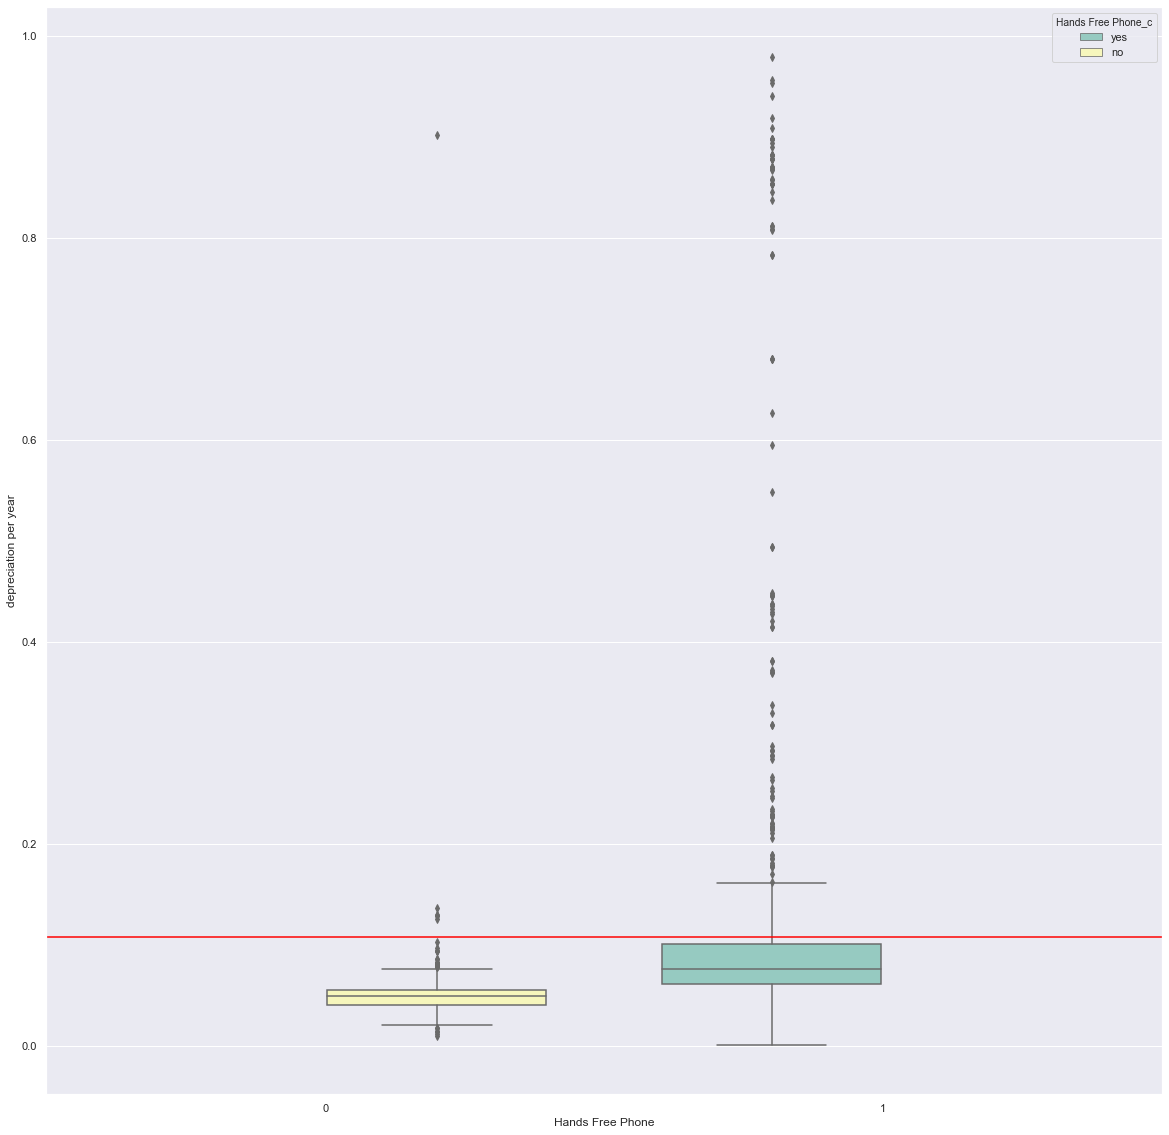

In [71]:
KBB_df['Hands Free Phone_c'] = KBB_df['Hands Free Phone']

KBB_df['Hands Free Phone_c'] = KBB_df['Hands Free Phone_c'].astype(str)

KBB_df["Hands Free Phone_c"].replace({"0": "no", "1": "yes"}, inplace=True)


plt.figure(figsize=(20,20))
ax = sns.boxplot(x="Hands Free Phone", y="depreciation per year", hue="Hands Free Phone_c",
                 data=KBB_df, palette="Set3")
plt.axhline(0.10845332075533622, 0, color="Red")
plt.savefig('Hands Free Phone.png')

In [72]:
grouped4 = KBB_df.groupby('Hands Free Phone_b')
n0 = grouped4.count().loc[0][0]
n1 = grouped4.count().loc[1][0]

# Calculate the mean
x0 = grouped4.mean().loc[0,'depreciation per year']
x1 = grouped4.mean().loc[1,'depreciation per year']


# Calculate the standard deviation
s0 = grouped4.std().loc[0,'depreciation per year']
s1 = grouped4.std().loc[1,'depreciation per year']


# t test from inf stats part a and b ,variables are  depreciation per year and 
#Separated the data into two groups, 0 and 1 , and the variable is depreciation per year

In [73]:
std_pool = np.sqrt(((n0-1) * (s0 ** 2) + (n1-1) * (s1 ** 2)) / (n0 + n1 - 2))

std_pool
print("The pooled standard deviation is: {} ".format(std_pool))

The pooled standard deviation is: 0.1578305129076817 


In [74]:
t_critical = (x0 - x1) / ((std_pool) * np.sqrt((1/n0) + (1/n1)))
print("The t critical value is: {} ".format(t_critical))

The t critical value is: -8.172106836896956 


In [75]:
# Calculating the p-value using the t-statistic from above
from scipy.stats import t, ttest_ind_from_stats
p_value = t.cdf(t_critical, n0+n1-2)
p_value
print("P-value given that the null hypothesis is true is: {}".format(p_value))

P-value given that the null hypothesis is true is: 3.880391909771883e-16


In [76]:
t_critical_stats, p_value_stats = ttest_ind_from_stats(x0, s0, n0, x1, s1, n1)
print("Using the scipy.stats function gives us t critical value of: {} and P-value of {}".format(t_critical_stats, p_value_stats))

Using the scipy.stats function gives us t critical value of: -8.172106836896956 and P-value of 7.760783819543766e-16


the pvalue is below .05 so we can reason that the null hypothesis is not statistically significant , 
The null hypothesis was that cars with hands free phone would deprecieate slower

In [77]:
KBB_df['Internet Access_b'] = KBB_df['Internet Access']

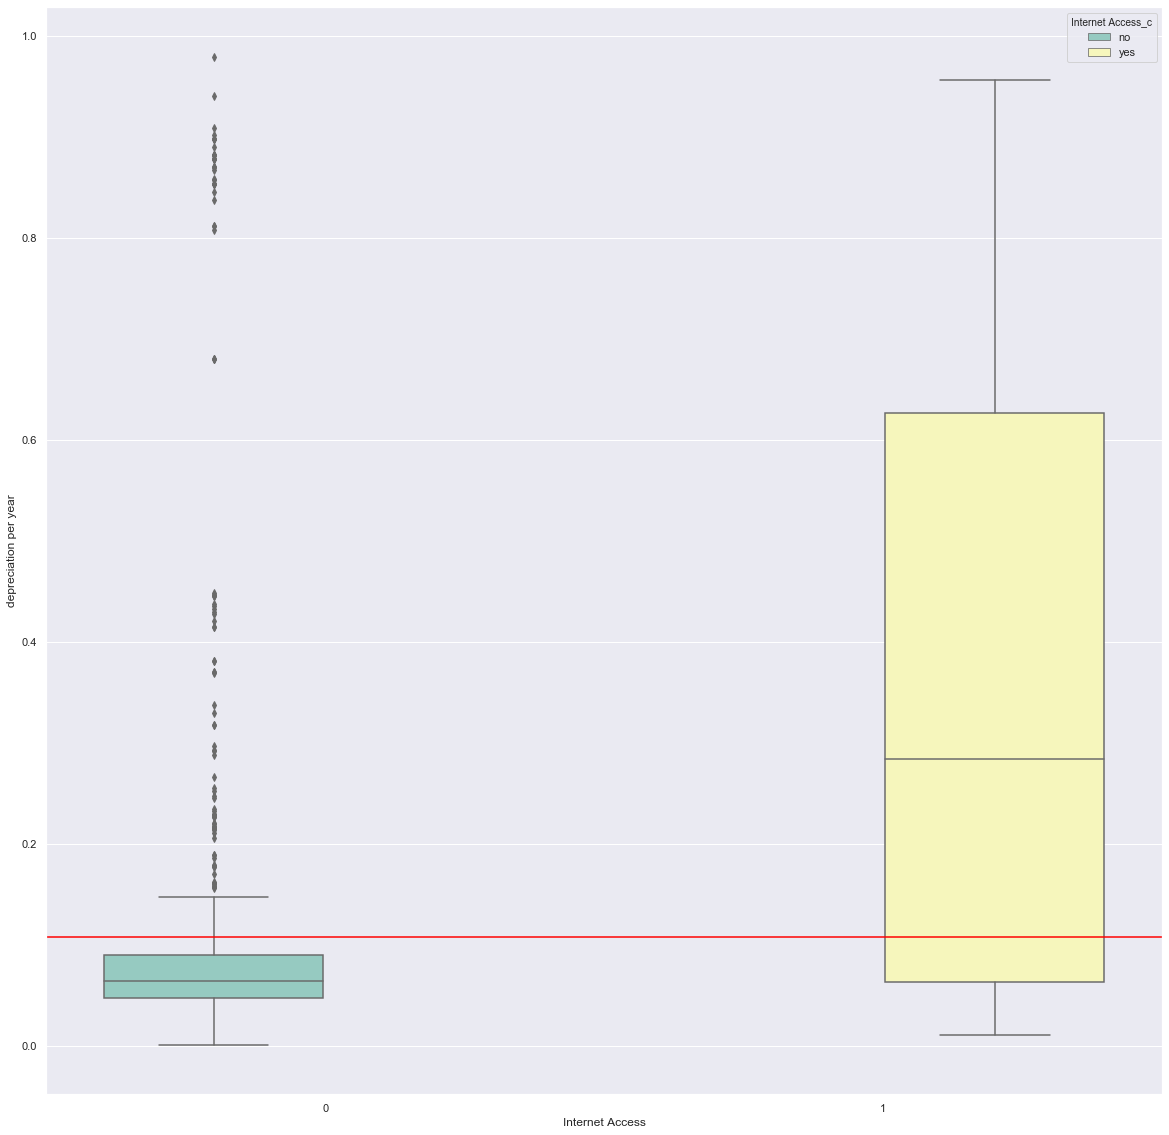

In [78]:
KBB_df['Internet Access_c'] = KBB_df['Internet Access']

KBB_df['Internet Access_c'] = KBB_df['Internet Access_c'].astype(str)

KBB_df["Internet Access_c"].replace({"0": "no", "1": "yes"}, inplace=True)


plt.figure(figsize=(20,20))
ax = sns.boxplot(x="Internet Access", y="depreciation per year", hue="Internet Access_c",
                 data=KBB_df, palette="Set3")
plt.axhline(0.10845332075533622, 0, color="Red")
plt.savefig('Internet Access.png')

In [79]:
grouped4 = KBB_df.groupby('Internet Access_b')
n0 = grouped4.count().loc[0][0]
n1 = grouped4.count().loc[1][0]

# Calculate the mean
x0 = grouped4.mean().loc[0,'depreciation per year']
x1 = grouped4.mean().loc[1,'depreciation per year']


# Calculate the standard deviation
s0 = grouped4.std().loc[0,'depreciation per year']
s1 = grouped4.std().loc[1,'depreciation per year']


# t test from inf stats part a and b ,variables are  depreciation per year and 
#Separated the data into two groups, 0 and 1 , and the variable is depreciation per year

In [80]:
std_pool = np.sqrt(((n0-1) * (s0 ** 2) + (n1-1) * (s1 ** 2)) / (n0 + n1 - 2))

std_pool
print("The pooled standard deviation is: {} ".format(std_pool))

The pooled standard deviation is: 0.15560396712370653 


In [81]:
t_critical = (x0 - x1) / ((std_pool) * np.sqrt((1/n0) + (1/n1)))
print("The t critical value is: {} ".format(t_critical))

The t critical value is: -10.130780954572344 


In [82]:
# Calculating the p-value using the t-statistic from above
from scipy.stats import t, ttest_ind_from_stats
the pvalue is below .05 so we can reason that the null hypothesis is not statistically significant , 
The null hypothesis was that cars with hands free phone would deprecieate slowerp_value = t.cdf(t_critical, n0+n1-2)
p_value
print("P-value given that the null hypothesis is true is: {}".format(p_value))

SyntaxError: invalid syntax (<ipython-input-82-7298081ff381>, line 3)

In [83]:
t_critical_stats, p_value_stats = ttest_ind_from_stats(x0, s0, n0, x1, s1, n1)
print("Using the scipy.stats function gives us t critical value of: {} and P-value of {}".format(t_critical_stats, p_value_stats))

Using the scipy.stats function gives us t critical value of: -10.130780954572343 and P-value of 3.487066742650247e-23


the pvalue is below .05 so we can reason that the null hypothesis is not statistically significant , 
The null hypothesis was that cars with hands free phone would deprecieate slower


In [84]:
KBB_df['Smartphone Interface_b'] = KBB_df['Smartphone Interface']

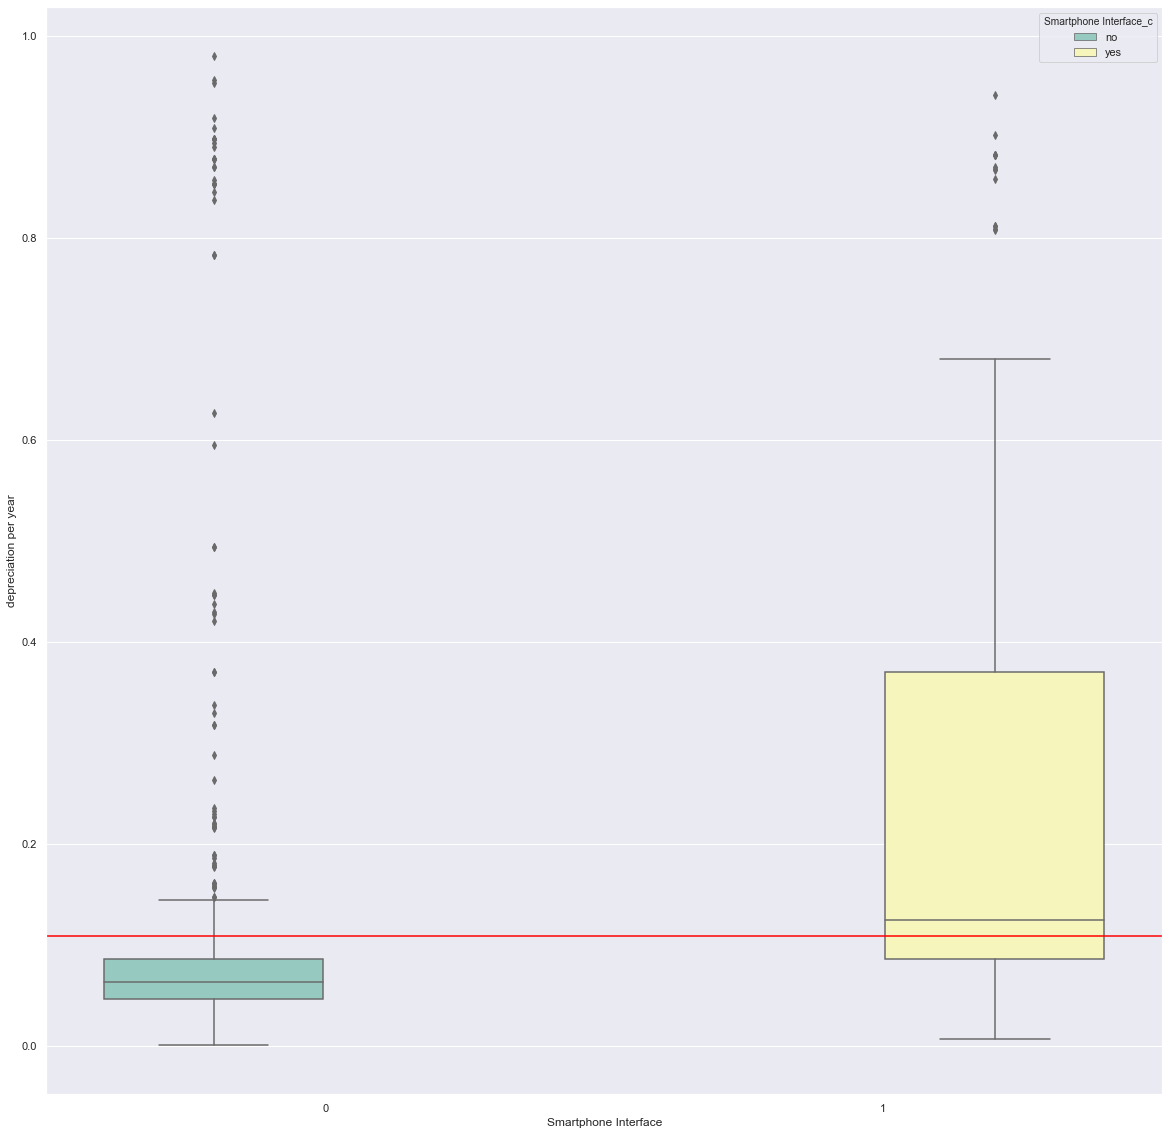

In [85]:
KBB_df['Smartphone Interface_c'] = KBB_df['Smartphone Interface']

KBB_df['Smartphone Interface_c'] = KBB_df['Smartphone Interface_c'].astype(str)

KBB_df["Smartphone Interface_c"].replace({"0": "no", "1": "yes"}, inplace=True)


plt.figure(figsize=(20,20))
ax = sns.boxplot(x="Smartphone Interface", y="depreciation per year", hue="Smartphone Interface_c",
                 data=KBB_df, palette="Set3")
plt.axhline(0.10845332075533622, 0, color="Red")
plt.savefig('Smartphone Interface.png')

In [86]:
grouped4 = KBB_df.groupby('Smartphone Interface_b')
n0 = grouped4.count().loc[0][0]
n1 = grouped4.count().loc[1][0]

# Calculate the mean
x0 = grouped4.mean().loc[0,'depreciation per year']
x1 = grouped4.mean().loc[1,'depreciation per year']


# Calculate the standard deviation
s0 = grouped4.std().loc[0,'depreciation per year']
s1 = grouped4.std().loc[1,'depreciation per year']


# t test from inf stats part a and b ,variables are  depreciation per year and 
#Separated the data into two groups, 0 and 1 , and the variable is depreciation per year 

In [87]:
std_pool = np.sqrt(((n0-1) * (s0 ** 2) + (n1-1) * (s1 ** 2)) / (n0 + n1 - 2))

std_pool
print("The pooled standard deviation is: {} ".format(std_pool))

The pooled standard deviation is: 0.15497223241857072 


In [88]:
t_critical = (x0 - x1) / ((std_pool) * np.sqrt((1/n0) + (1/n1)))
print("The t critical value is: {} ".format(t_critical))

The t critical value is: -10.634221828433063 


In [89]:
# Calculating the p-value using the t-statistic from above
from scipy.stats import t, ttest_ind_from_stats
p_value = t.cdf(t_critical, n0+n1-2)
p_value
print("P-value given that the null hypothesis is true is: {}".format(p_value))

P-value given that the null hypothesis is true is: 1.3899928461379015e-25


In [90]:
t_critical_stats, p_value_stats = ttest_ind_from_stats(x0, s0, n0, x1, s1, n1)
print("Using the scipy.stats function gives us t critical value of: {} and P-value of {}".format(t_critical_stats, p_value_stats))

Using the scipy.stats function gives us t critical value of: -10.634221828433063 and P-value of 2.779985692275803e-25


the pvalue is below .05 so we can reason that the null hypothesis is not statistically significant , 
The null hypothesis was that cars with Smartphone Interface would deprecieate slower


In [91]:
KBB_df['USB Port_b'] = KBB_df['USB Port']

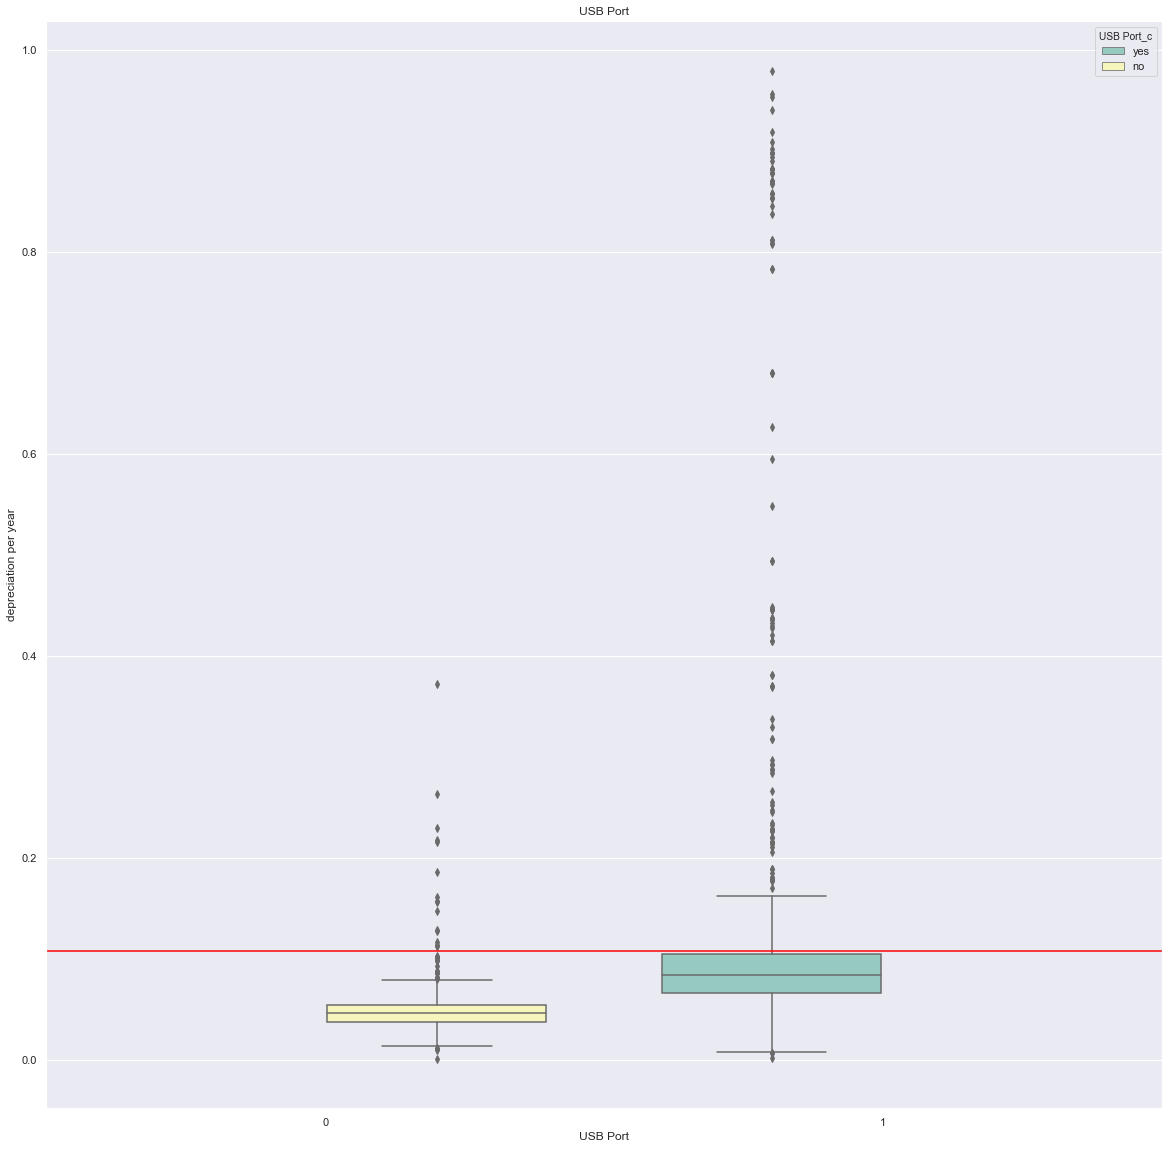

In [92]:
KBB_df['USB Port_c'] = KBB_df['USB Port']

KBB_df['USB Port_c'] = KBB_df['USB Port_c'].astype(str)

KBB_df["USB Port_c"].replace({"0": "no", "1": "yes"}, inplace=True)


plt.figure(figsize=(20,20))
ax = sns.boxplot(x="USB Port", y="depreciation per year", hue="USB Port_c",
                 data=KBB_df, palette="Set3")
plt.title('USB Port')
plt.axhline(0.10845332075533622, 0, color="Red")
plt.savefig('USB Port.png')

In [93]:
grouped = KBB_df.groupby('USB Port_b')
n0 = grouped.count().loc[0][0]
n1 = grouped.count().loc[1][0]

# Calculate the mean
x0 = grouped.mean().loc[0,'depreciation per year']
x1 = grouped.mean().loc[1,'depreciation per year']


# Calculate the standard deviation
s0 = grouped.std().loc[0,'depreciation per year']
s1 = grouped.std().loc[1,'depreciation per year']


# t test from inf stats part a and b ,variables are  depreciation per year and 
#Separated the data into two groups, 0 and 1 , and the variable is depreciation per year 

In [94]:
std_pool = np.sqrt(((n0-1) * (s0 ** 2) + (n1-1) * (s1 ** 2)) / (n0 + n1 - 2))

std_pool
print("The pooled standard deviation is: {} ".format(std_pool))

The pooled standard deviation is: 0.15457837339847433 


In [95]:
t_critical = (x0 - x1) / ((std_pool) * np.sqrt((1/n0) + (1/n1)))
print("The t critical value is: {} ".format(t_critical))

The t critical value is: -10.939342736887395 


In [96]:
# Calculating the p-value using the t-statistic from above
from scipy.stats import t, ttest_ind_from_stats
p_value = t.cdf(t_critical, n0+n1-2)
p_value
print("P-value given that the null hypothesis is true is: {}".format(p_value))

P-value given that the null hypothesis is true is: 6.780562093408711e-27


In [97]:
t_critical_stats, p_value_stats = ttest_ind_from_stats(x0, s0, n0, x1, s1, n1)
print("Using the scipy.stats function gives us t critical value of: {} and P-value of {}".format(t_critical_stats, p_value_stats))

Using the scipy.stats function gives us t critical value of: -10.939342736887395 and P-value of 1.3561124186817423e-26


the pvalue is below .05 so we can reason that the null hypothesis is not statistically significant , 
The null hypothesis was that cars with USB Port would deprecieate slower


In [98]:
KBB_df['Voice Recognition System_b'] = KBB_df['Voice Recognition System']

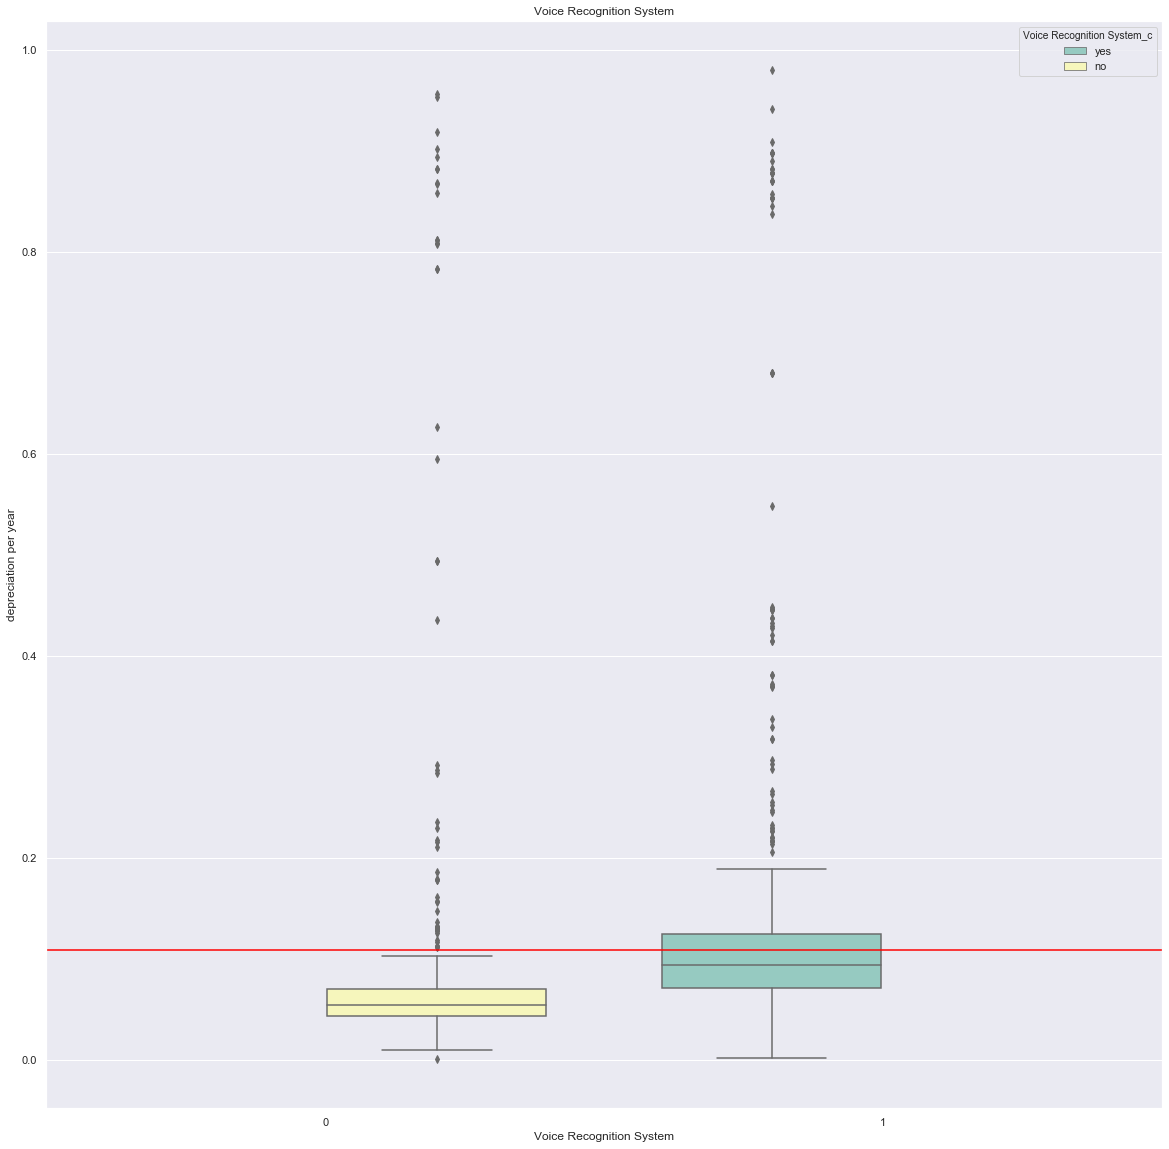

In [99]:
KBB_df['Voice Recognition System_c'] = KBB_df['Voice Recognition System']

KBB_df['Voice Recognition System_c'] = KBB_df['Voice Recognition System_c'].astype(str)

KBB_df["Voice Recognition System_c"].replace({"0": "no", "1": "yes"}, inplace=True)


plt.figure(figsize=(20,20))
ax = sns.boxplot(x="Voice Recognition System", y="depreciation per year", hue="Voice Recognition System_c",
                 data=KBB_df, palette="Set3")
plt.title('Voice Recognition System')
plt.axhline(0.10845332075533622, 0, color="Red")
plt.savefig('Voice Recognition System.png')

In [100]:
grouped1 = KBB_df.groupby('Voice Recognition System_b')
n0 = grouped1.count().loc[0][0]
n1 = grouped1.count().loc[1][0]

# Calculate the mean
x0 = grouped1.mean().loc[0,'depreciation per year']
x1 = grouped1.mean().loc[1,'depreciation per year']


# Calculate the standard deviation
s0 = grouped1.std().loc[0,'depreciation per year']
s1 = grouped1.std().loc[1,'depreciation per year']


# t test from inf stats part a and b ,variables are  depreciation per year and 
#Separated the data into two groups, 0 and 1 , and the variable is depreciation per year

In [101]:
std_pool = np.sqrt(((n0-1) * (s0 ** 2) + (n1-1) * (s1 ** 2)) / (n0 + n1 - 2))

std_pool
print("The pooled standard deviation is: {} ".format(std_pool))

The pooled standard deviation is: 0.15695819578151576 


In [102]:
t_critical = (x0 - x1) / ((std_pool) * np.sqrt((1/n0) + (1/n1)))
print("The t critical value is: {} ".format(t_critical))

The t critical value is: -8.980353388303394 


In [103]:
# Calculating the p-value using the t-statistic from above
from scipy.stats import t, ttest_ind_from_stats
p_value = t.cdf(t_critical, n0+n1-2)
p_value
print("P-value given that the null hypothesis is true is: {}".format(p_value))

P-value given that the null hypothesis is true is: 5.228369144569117e-19


In [104]:
t_critical_stats, p_value_stats = ttest_ind_from_stats(x0, s0, n0, x1, s1, n1)
print("Using the scipy.stats function gives us t critical value of: {} and P-value of {}".format(t_critical_stats, p_value_stats))

Using the scipy.stats function gives us t critical value of: -8.980353388303394 and P-value of 1.0456738289138234e-18


the pvalue is below .05 so we can reason that the null hypothesis is not statistically significant , 
The null hypothesis was that cars with voice recognition would deprecieate slower 

In [105]:
KBB_df['Premium Radio_b'] = KBB_df['Premium Radio']

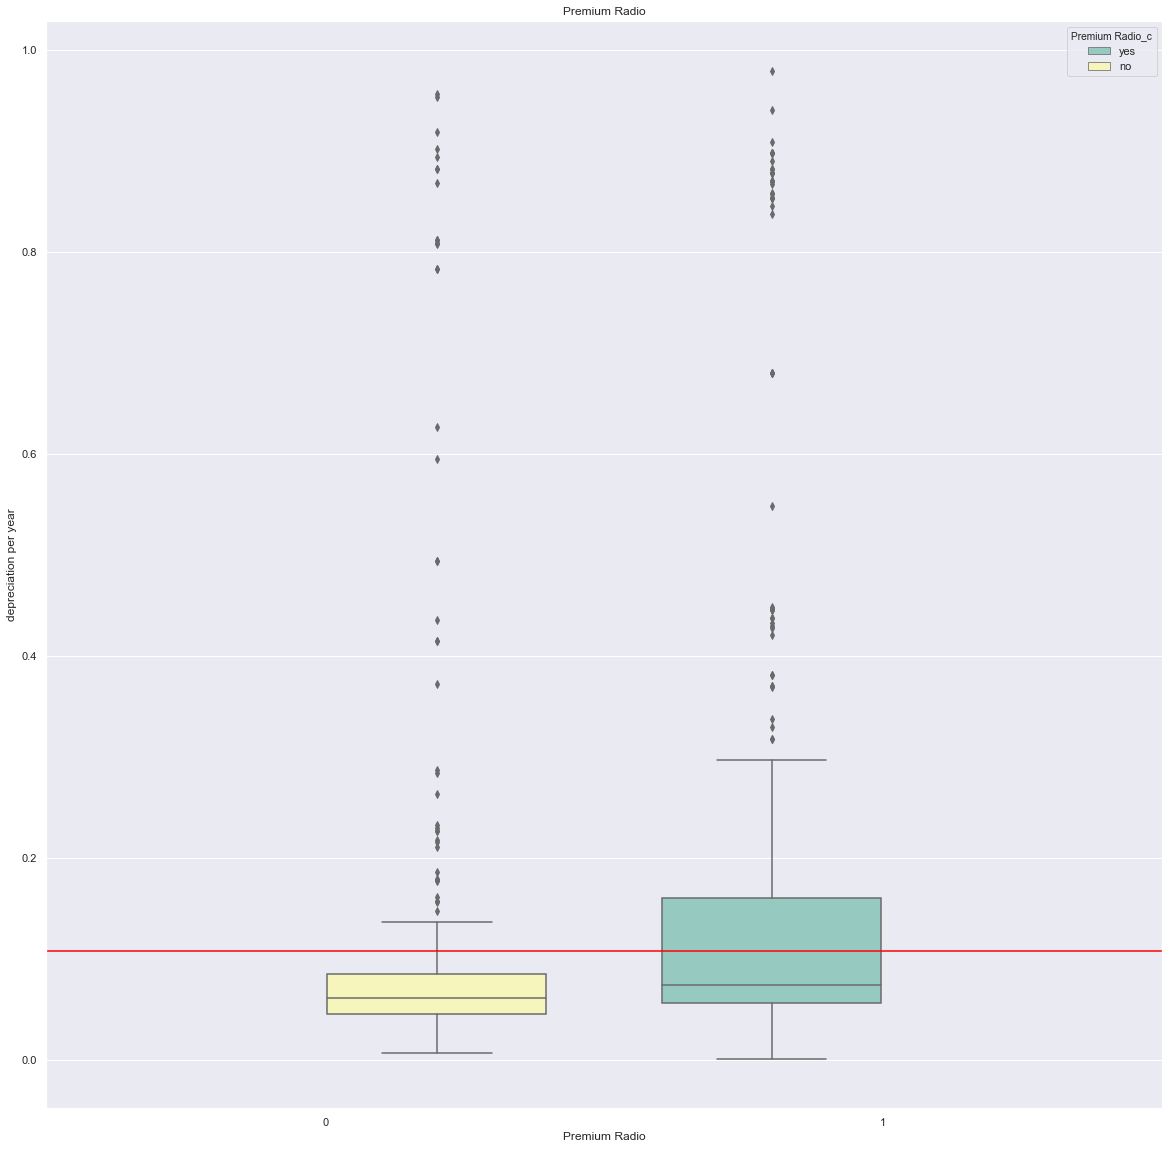

In [106]:
KBB_df['Premium Radio_c'] = KBB_df['Premium Radio']

KBB_df['Premium Radio_c'] = KBB_df['Premium Radio_c'].astype(str)

KBB_df["Premium Radio_c"].replace({"0": "no", "1": "yes"}, inplace=True)


plt.figure(figsize=(20,20))
ax = sns.boxplot(x="Premium Radio", y="depreciation per year", hue="Premium Radio_c",
                 data=KBB_df, palette="Set3")
plt.title('Premium Radio')
plt.axhline(0.10845332075533622, 0, color="Red")
plt.savefig('Premium Radio.png')

In [107]:
grouped2 = KBB_df.groupby('Premium Radio_b')
n0 = grouped2.count().loc[0][0]
n1 = grouped2.count().loc[1][0]

# Calculate the mean
x0 = grouped2.mean().loc[0,'depreciation per year']
x1 = grouped2.mean().loc[1,'depreciation per year']


# Calculate the standard deviation
s0 = grouped2.std().loc[0,'depreciation per year']
s1 = grouped2.std().loc[1,'depreciation per year']


# t test from inf stats part a and b ,variables are  depreciation per year and 
#Separated the data into two groups, 0 and 1 , and the variable is depreciation per year 

In [108]:
std_pool = np.sqrt(((n0-1) * (s0 ** 2) + (n1-1) * (s1 ** 2)) / (n0 + n1 - 2))

std_pool
print("The pooled standard deviation is: {} ".format(std_pool))

The pooled standard deviation is: 0.1564515691844753 


In [109]:
t_critical = (x0 - x1) / ((std_pool) * np.sqrt((1/n0) + (1/n1)))
print("The t critical value is: {} ".format(t_critical))

The t critical value is: -9.423642642411465 


In [110]:
# Calculating the p-value using the t-statistic from above
from scipy.stats import t, ttest_ind_from_stats
p_value = t.cdf(t_critical, n0+n1-2)
p_value
print("P-value given that the null hypothesis is true is: {}".format(p_value))

P-value given that the null hypothesis is true is: 1.1135669373518473e-20


In [111]:
t_critical_stats, p_value_stats = ttest_ind_from_stats(x0, s0, n0, x1, s1, n1)
print("Using the scipy.stats function gives us t critical value of: {} and P-value of {}".format(t_critical_stats, p_value_stats))

Using the scipy.stats function gives us t critical value of: -9.423642642411465 and P-value of 2.2271338747036947e-20


the pvalue is below .05 so we can reason that the null hypothesis is not statistically significant , 
The null hypothesis was that cars with premium radio would deprecieate slower 

In [112]:
KBB_df['Bluetooth Streaming Audio_b'] = KBB_df['Bluetooth Streaming Audio']

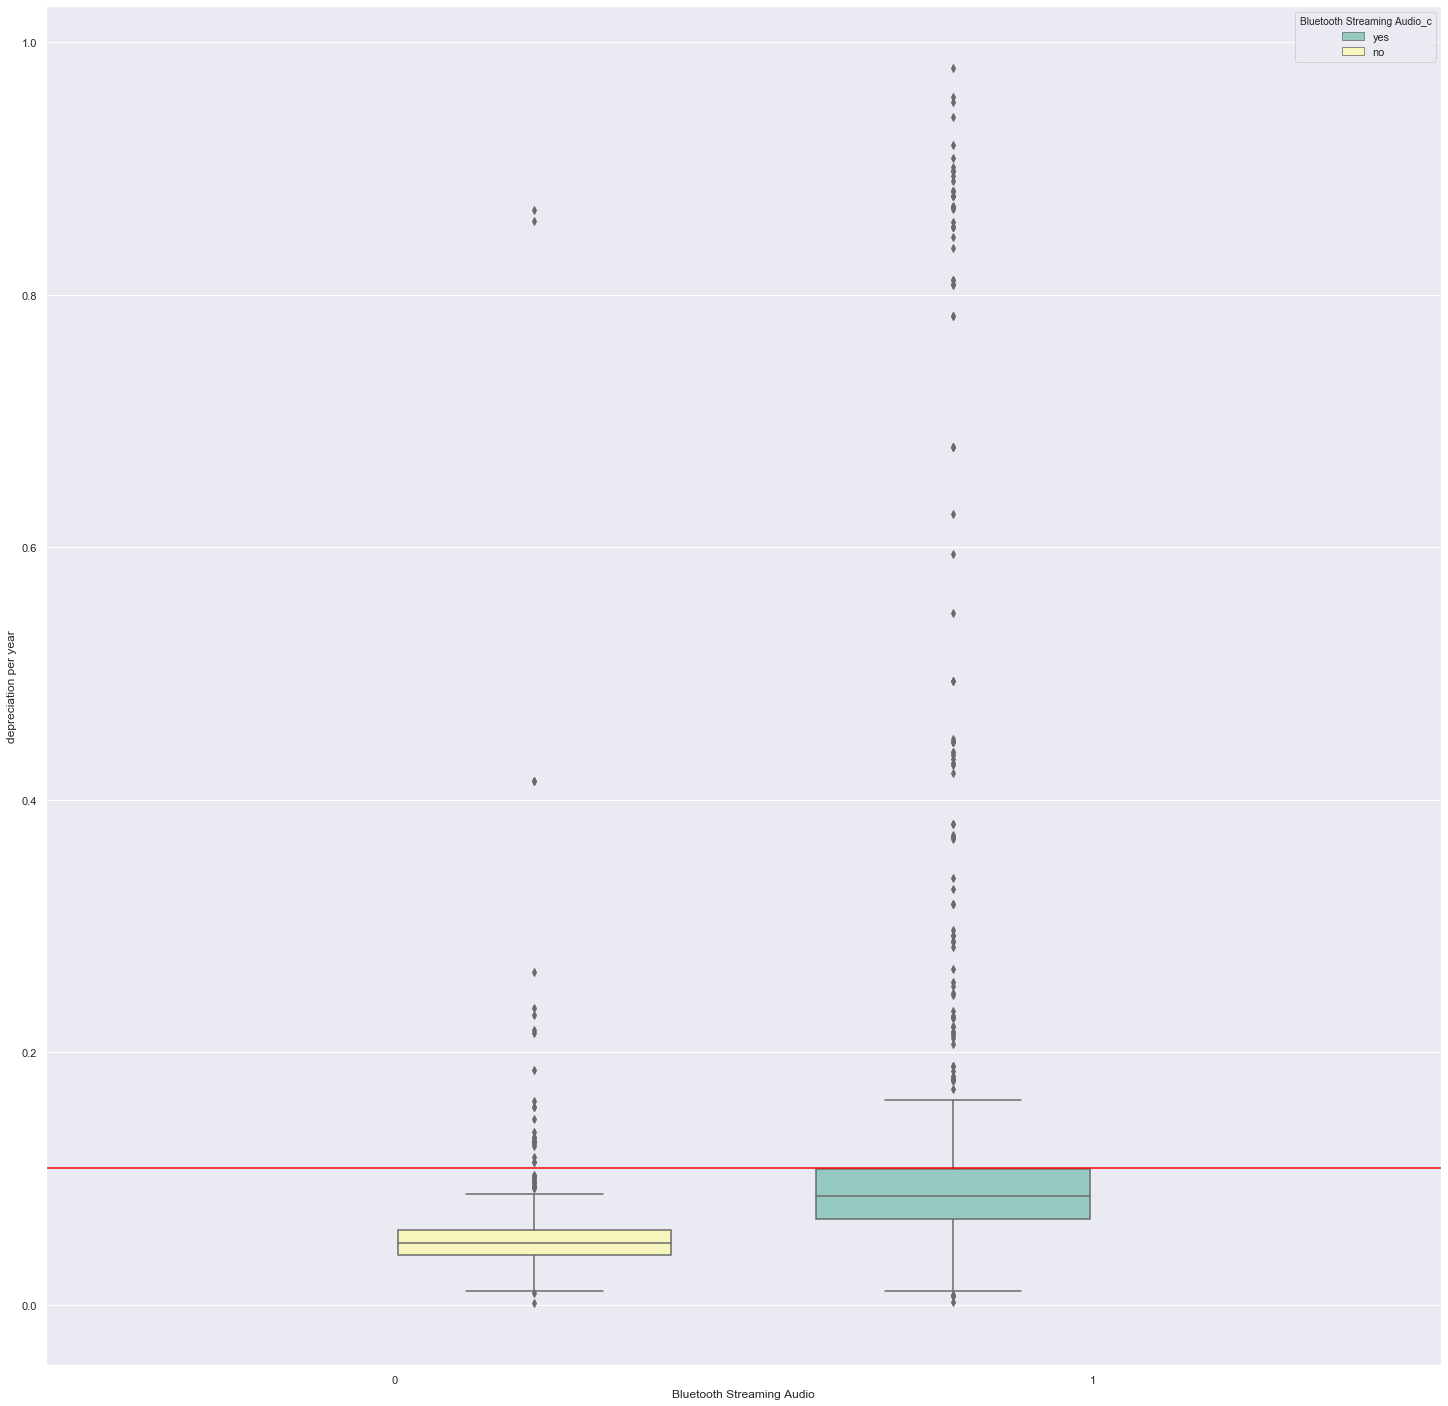

In [113]:
KBB_df['Bluetooth Streaming Audio_c'] = KBB_df['Bluetooth Streaming Audio']

KBB_df['Bluetooth Streaming Audio_c'] = KBB_df['Bluetooth Streaming Audio_c'].astype(str)

KBB_df["Bluetooth Streaming Audio_c"].replace({"0": "no", "1": "yes"}, inplace=True)


plt.figure(figsize=(25,25))
ax = sns.boxplot(x="Bluetooth Streaming Audio", y="depreciation per year", hue="Bluetooth Streaming Audio_c",
                 data=KBB_df, palette="Set3")
plt.axhline(0.10845332075533622, 0, color="Red")
plt.savefig('Bluetooth_Streaming_Audio.png')

In [114]:
grouped3 = KBB_df.groupby('Bluetooth Streaming Audio_b')
n0 = grouped3.count().loc[0][0]
n1 = grouped3.count().loc[1][0]

# Calculate the mean
x0 = grouped3.mean().loc[0,'depreciation per year']
x1 = grouped3.mean().loc[1,'depreciation per year']


# Calculate the standard deviation
s0 = grouped3.std().loc[0,'depreciation per year']
s1 = grouped3.std().loc[1,'depreciation per year']


# t test from inf stats part a and b ,variables are  depreciation per year and 
#Separated the data into two groups, 0 and 1 , and the variable is depreciation per year

In [115]:
std_pool = np.sqrt(((n0-1) * (s0 ** 2) + (n1-1) * (s1 ** 2)) / (n0 + n1 - 2))

std_pool
print("The pooled standard deviation is: {} ".format(std_pool))

The pooled standard deviation is: 0.15429431244181174 


In [116]:
t_critical = (x0 - x1) / ((std_pool) * np.sqrt((1/n0) + (1/n1)))
print("The t critical value is: {} ".format(t_critical))

The t critical value is: -11.15562802792002 


In [117]:
# Calculating the p-value using the t-statistic from above
from scipy.stats import t, ttest_ind_from_stats
p_value = t.cdf(t_critical, n0+n1-2)
p_value
print("P-value given that the null hypothesis is true is: {}".format(p_value))

P-value given that the null hypothesis is true is: 7.646974867259409e-28


In [118]:
t_critical_stats, p_value_stats = ttest_ind_from_stats(x0, s0, n0, x1, s1, n1)
print("Using the scipy.stats function gives us t critical value of: {} and P-value of {}".format(t_critical_stats, p_value_stats))

Using the scipy.stats function gives us t critical value of: -11.15562802792002 and P-value of 1.5293949734518818e-27


the pvalue is below .05 so we can reason that the null hypothesis is not statistically significant , 
The null hypothesis was that cars with blue tooth streaming audio would deprecieate slower 

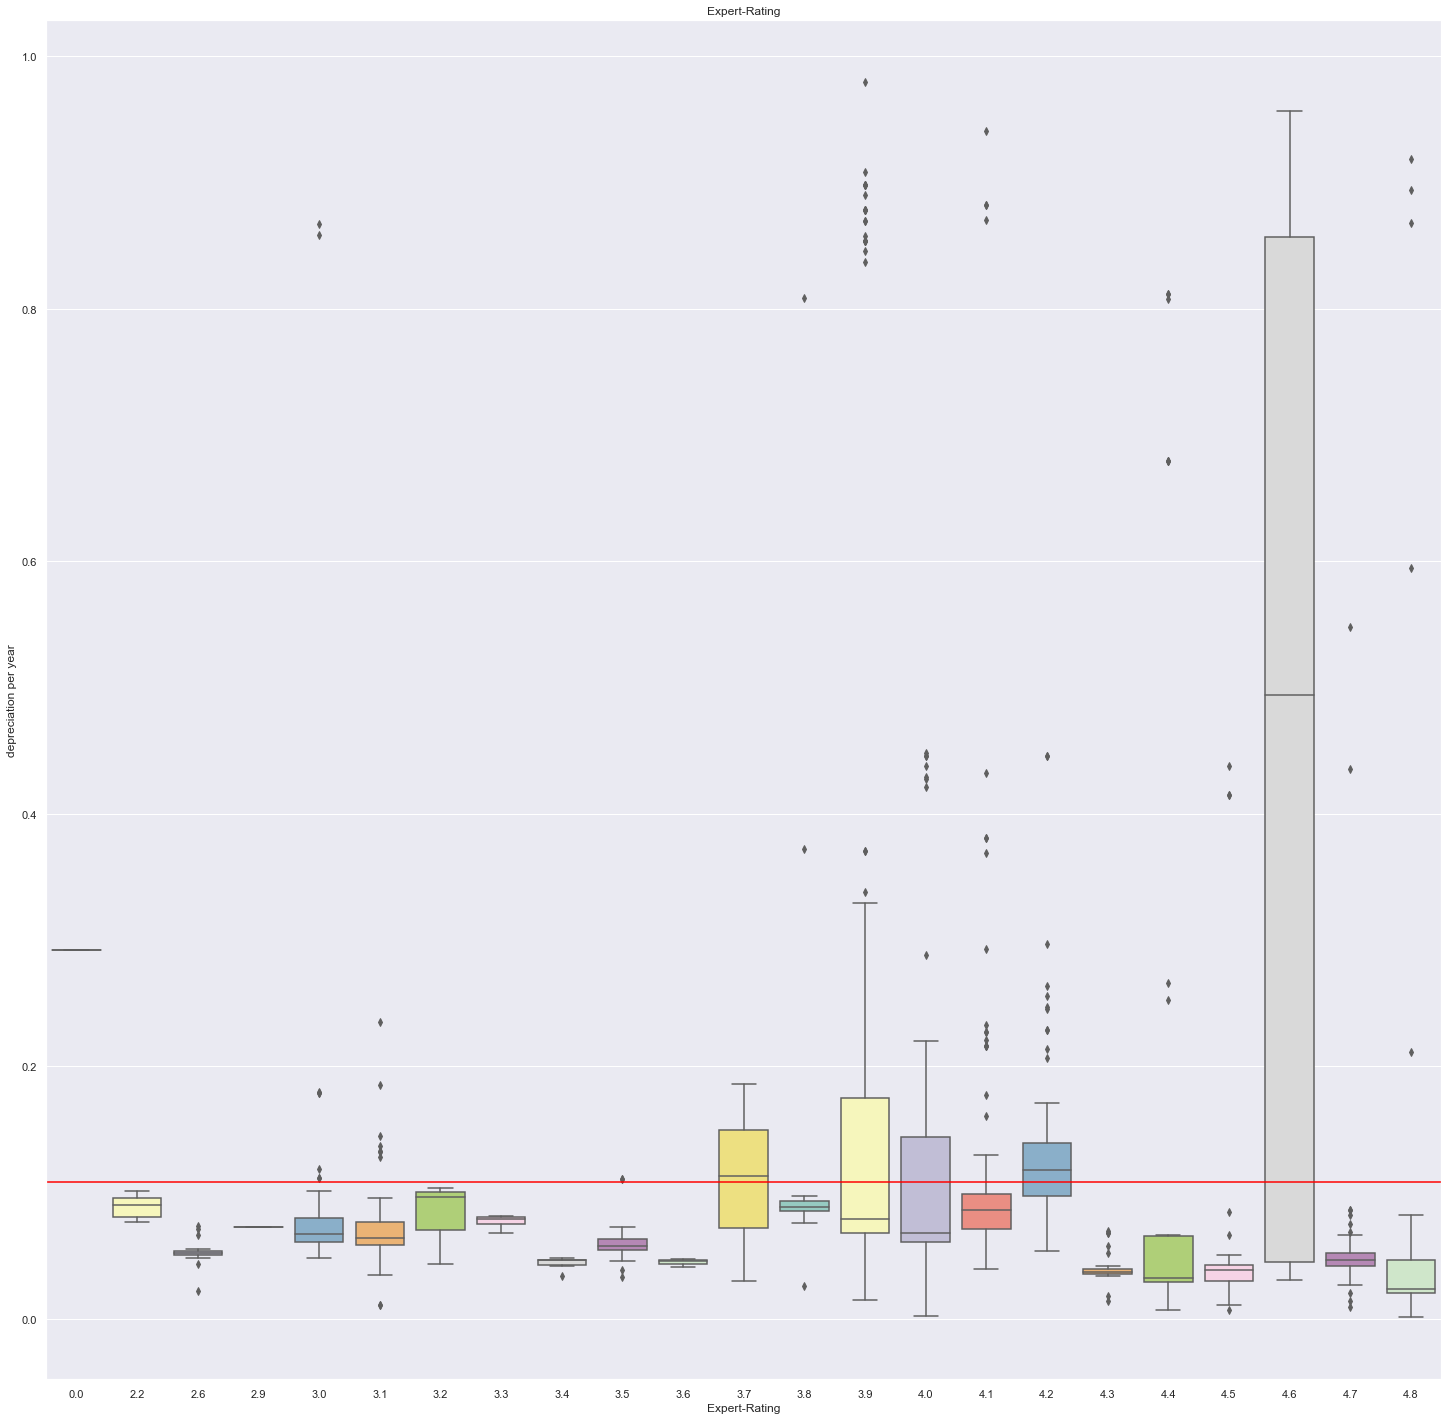

In [119]:
#do boxplot for safety/consumer/expert ratings
#KBB_df['Expert-Rating_c'] = KBB_df['Expert-Rating']

#KBB_df['Expert-Rating_c'] = KBB_df['Expert-Rating_c'].astype(str)

#KBB_df["Expert-Rating_c"].replace({"0": "no", "1": "yes"}, inplace=True)



plt.figure(figsize=(25,25))
ax = sns.boxplot(x="Expert-Rating", y="depreciation per year", 
                 data=KBB_df, palette="Set3")
plt.title('Expert-Rating')
plt.axhline(0.10845332075533622, 0, color="Red")
plt.savefig('Expert-Rating.png')

In [120]:
KBB_df['Expert_Rating_b']= KBB_df['Expert-Rating']

In [121]:
KBB_df= KBB_df.rename(columns={'Expert-Rating': 'Expert_Rating'})

In [122]:
#pearson stats
from scipy.stats.stats import pearsonr   
a = KBB_df['Expert_Rating']
b = KBB_df['depreciation']   
print (pearsonr(a,b))



(0.12380386069872037, 2.0179061839621092e-05)


first value is the corelation is 0.12380386069872037, pvalue is 2.0179061839621092e-05, the pvalue is below .05 so we can reason that the null hypothesis is not statistically significant , 
The null hypothesis was that cars with an expert rating above 3.7 would depreciate at a slower rate 

In [123]:
KBB_df= KBB_df.rename(columns={'Consumer-Rating': 'Consumer_Rating'})

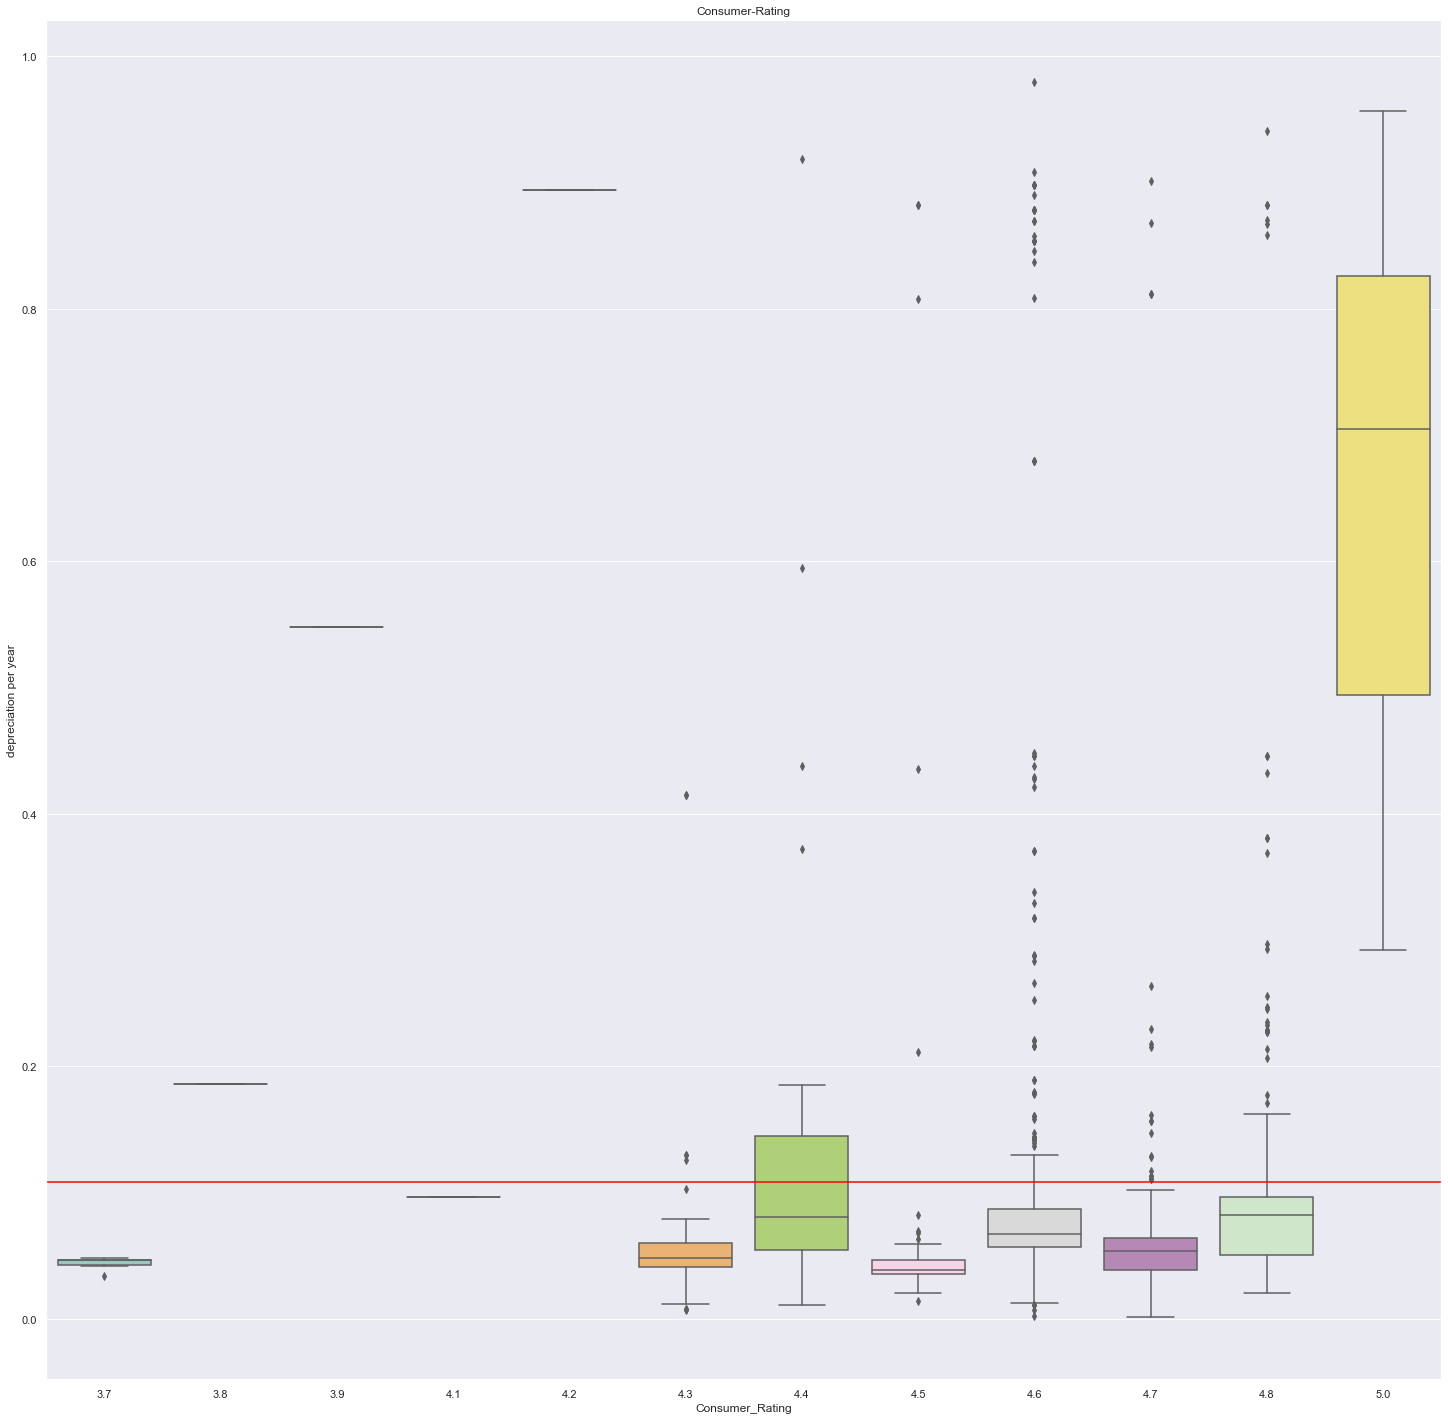

In [124]:
plt.figure(figsize=(25,25))
ax = sns.boxplot(x="Consumer_Rating", y="depreciation per year", 
                 data=KBB_df, palette="Set3")
plt.title('Consumer-Rating')
plt.axhline(0.10845332075533622, 0, color="Red")
plt.savefig('Consumer-Rating.png')

In [125]:
KBB_df['Consumer_Rating'] = KBB_df['Consumer_Rating'].astype(float)

In [126]:
#pearson stats
from scipy.stats.stats import pearsonr   
a = KBB_df['Consumer_Rating']
b = KBB_df['depreciation']   
print (pearsonr(a,b))

#first value is the corelation is -0.1735374587285996, pvalue is 1.9985596118595722e-09, since the pvalue is less than

(-0.1735374587285996, 1.9985596118595722e-09)


first value is the corelation is -0.1735374587285996, pvalue is 1.9985596118595722e-09, the pvalue is below .05 so we can reason that the null hypothesis is not statistically significant , 
The null hypothesis was that cars with an consumer rating above 4.3 would depreciate at a slower rate 

In [127]:
KBB_df['SafetyRating_b']= KBB_df['SafetyRating']

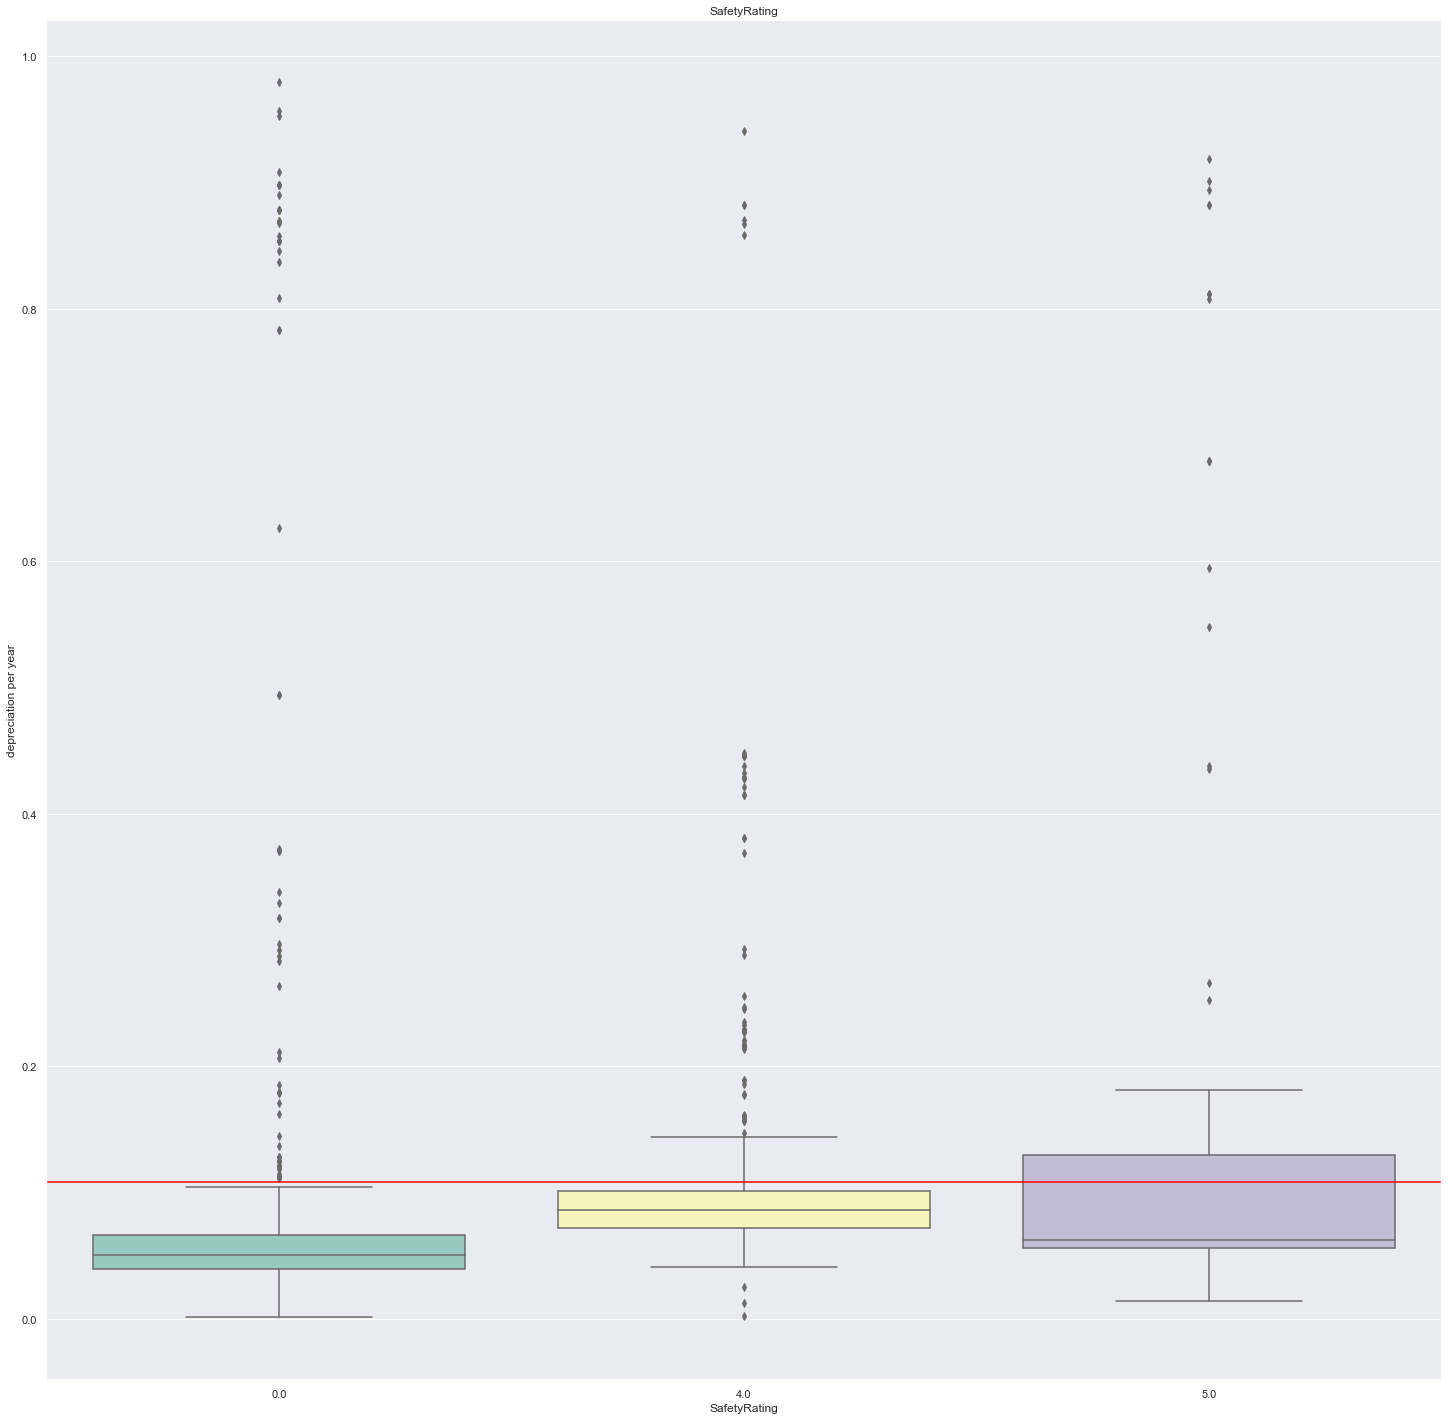

In [128]:
plt.figure(figsize=(25,25))
ax = sns.boxplot(x="SafetyRating", y="depreciation per year", 
                 data=KBB_df, palette="Set3")
plt.title('SafetyRating')
plt.axhline(0.10845332075533622, 0, color="Red")
plt.savefig('SafetyRating.png')

#change categories into strings, after runing the graphs then I will make dummies 

In [129]:
#pearson stats
from scipy.stats.stats import pearsonr   
a = KBB_df['SafetyRating']
b = KBB_df['depreciation']   
print (pearsonr(a,b))

#first value is the corelation is -0.23465831048933028, pvalue is 3.2665185525752527e-16, since the pvalue is less than

(-0.23465831048933028, 3.2665185525752527e-16)


first value is the corelation is -0.23465831048933028, pvalue is 3.2665185525752527e-16, the pvalue is below .05 so we can reason that the null hypothesis is not statistically significant , 
The null hypothesis was that cars with an consumer rating above 0 would depreciate at a slower rate 

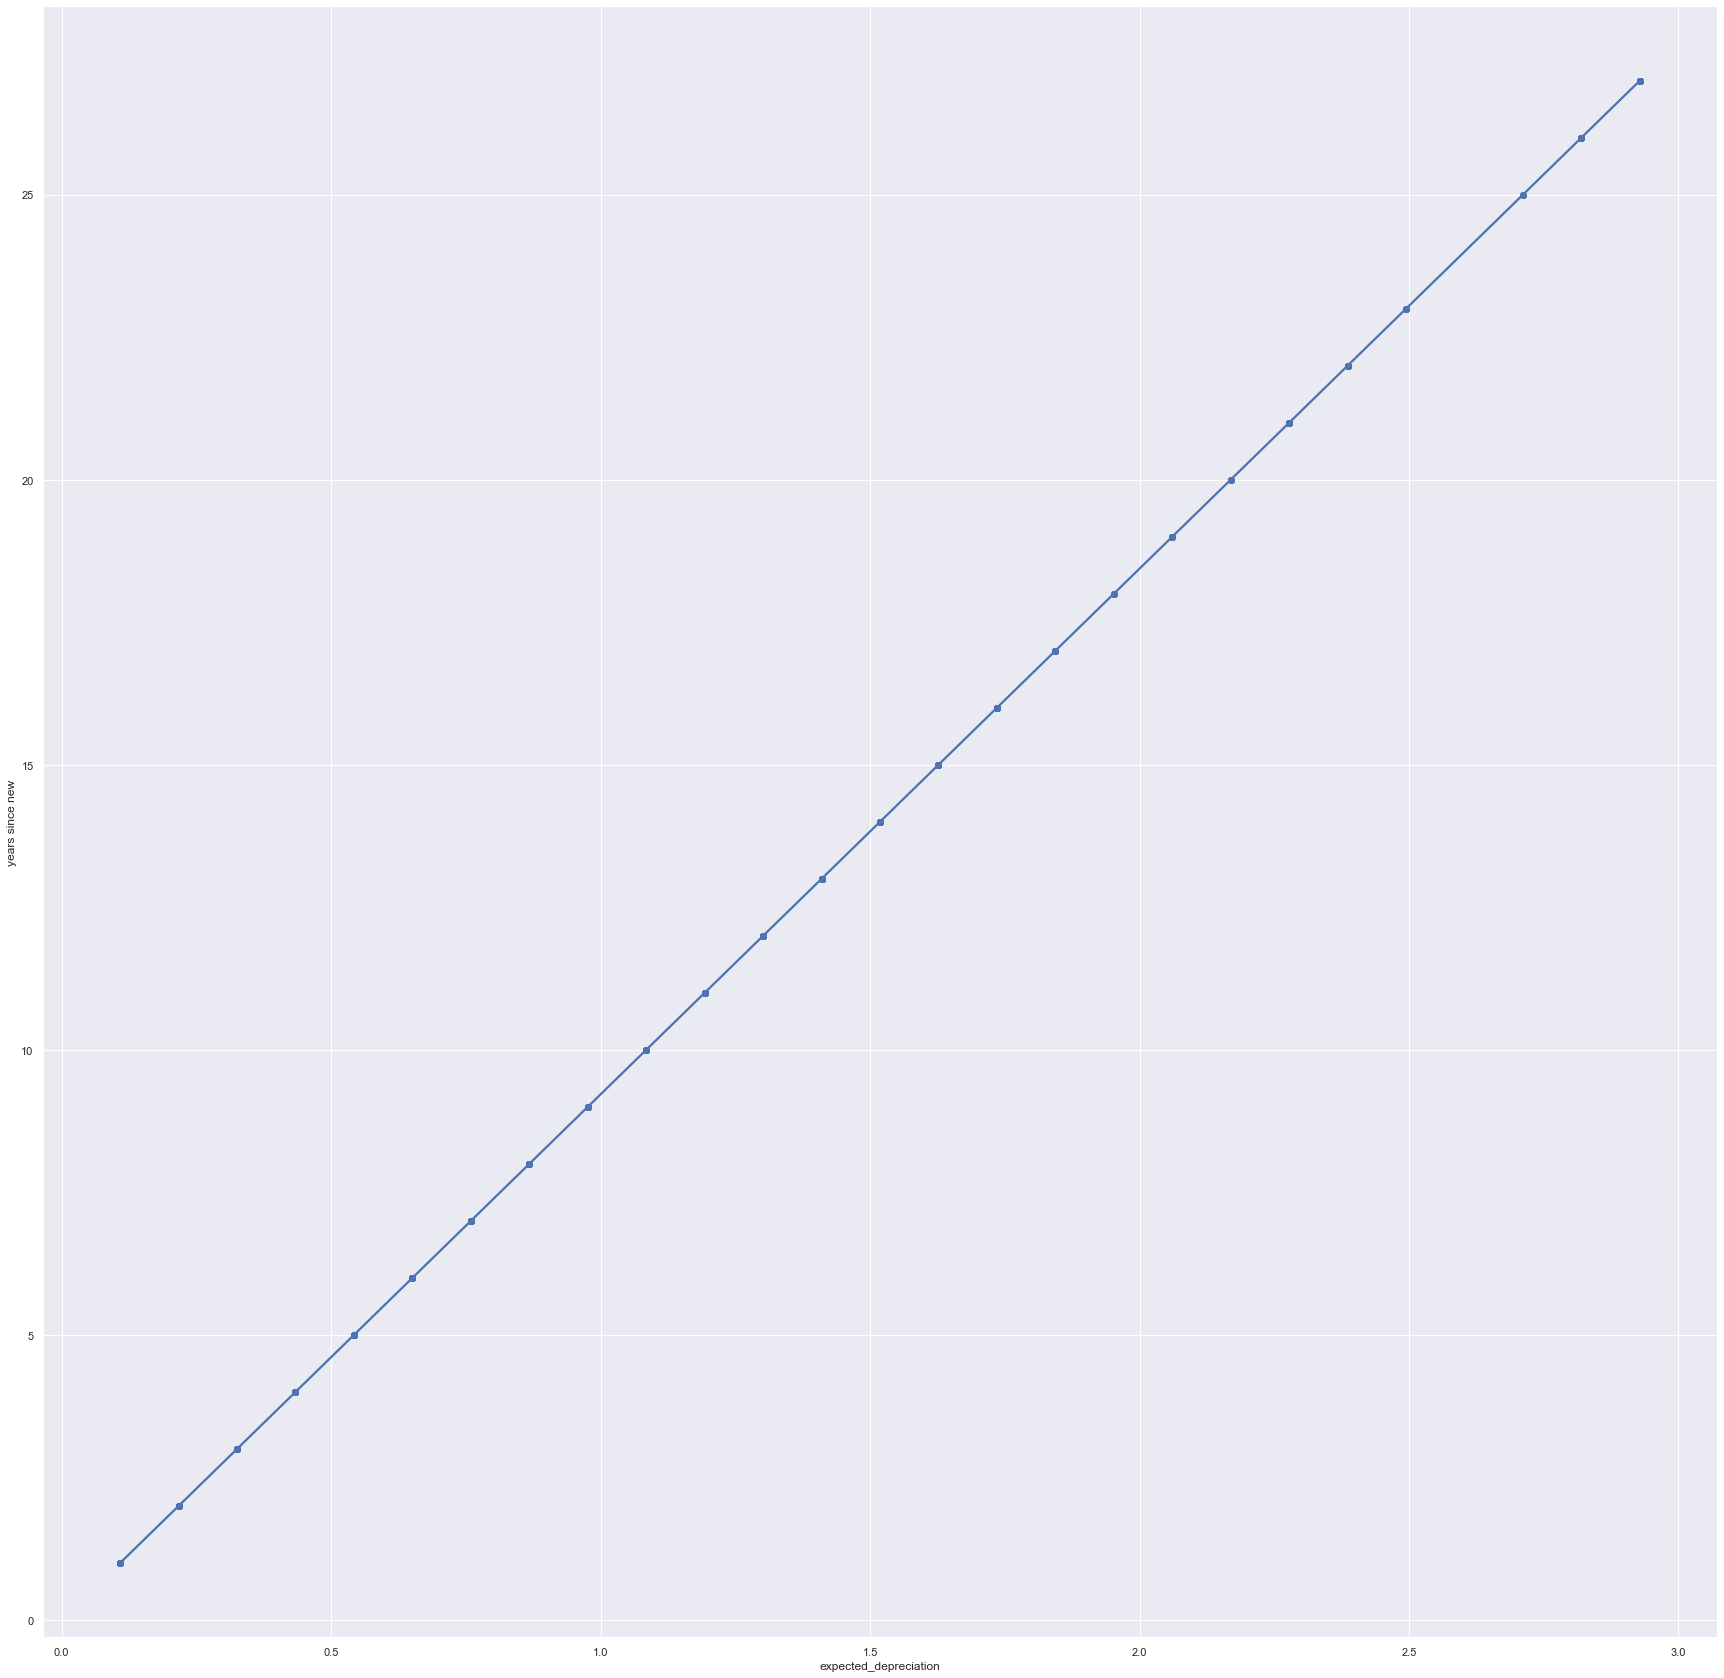

In [130]:
ax = sns.regplot(x="expected_depreciation", y="years since new", data=KBB_df) #Plot data and a linear regression
plt.savefig('Linear_regression_expected_depreciation.png')
 #y="sepal_length", model fit
 #data=KBB_df,
 #ax=ax)

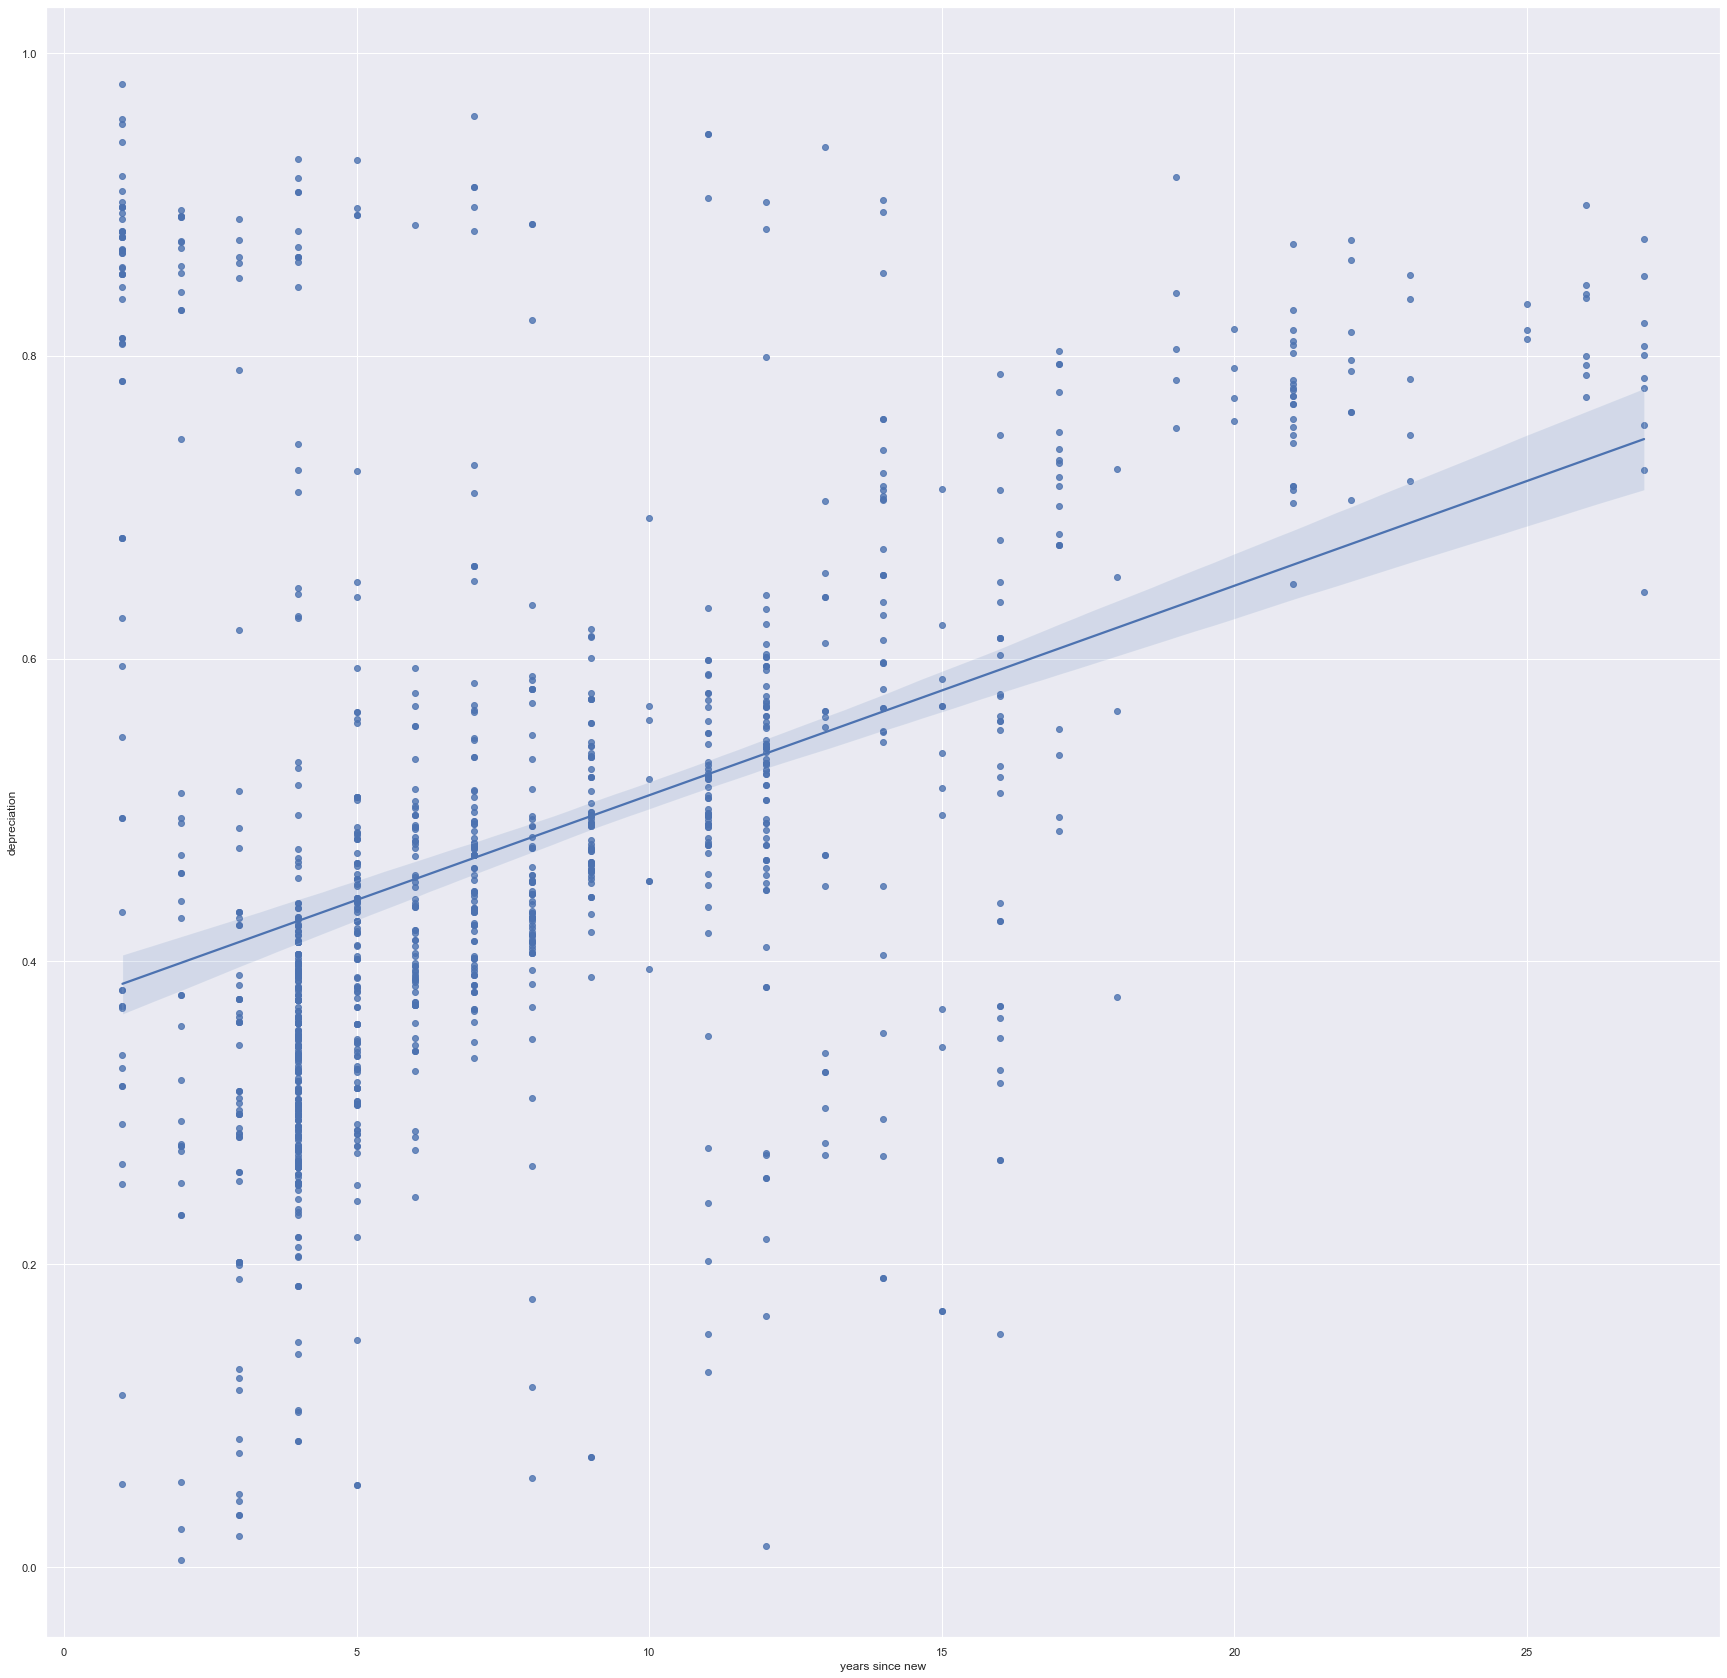

In [131]:
ax = sns.regplot(x="years since new", y="depreciation", data=KBB_df)
plt.savefig('Linear_regression_depreciation.png')
#linear regression with depreciation

In [132]:
import numpy as np
from sklearn import linear_model

In [133]:
KBB_df = KBB_df.fillna(0)

In [134]:
from sklearn import linear_model
import statsmodels.api as sm

In [135]:
reg = linear_model.LinearRegression()

In [141]:
reg.fit(KBB_df[['HP_b', 'SafetyRating_b', 'Consumer_Rating', 'Expert_Rating_b', 'Sale_price_in_USD_1', 'Bluetooth Streaming Audio_b','Premium Radio_b', 'Voice Recognition System_b', 'USB Port_b', 'Smartphone Interface_b', 'Internet Access_b', 'Hands Free Phone_b', 'Audible Text Messaging_b', 'Bluetooth Wireless Technology_b', 'MPG_b', 'numfeat_b']], KBB_df.depreciation)

KeyError: "['Sale_price_in_USD_1'] not in index"

In [137]:
print(reg.coef_, reg.intercept_)

AttributeError: 'LinearRegression' object has no attribute 'coef_'

In [138]:
KBB_df['MPG_b'] = KBB_df['MPG_b'].astype(float)

In [173]:
x = KBB_df[['HP_b', 'SafetyRating_b', 'Consumer_Rating', 'Expert_Rating_b', 'Sale_price_in_USD', 'Bluetooth Streaming Audio_b','Premium Radio_b', 'Voice Recognition System_b', 'USB Port_b', 'Smartphone Interface_b', 'Internet Access_b', 'Hands Free Phone_b', 'Audible Text Messaging_b', 'Bluetooth Wireless Technology_b', 'MPG_b', 'numfeat_b']]
y = KBB_df['depreciation']

In [174]:
x.shape

(1179, 16)

In [175]:
len(y)

1179

In [176]:
y

0       0.979689
1       0.958367
2       0.956662
3       0.953050
4       0.946220
          ...   
1174    0.034104
1175    0.025292
1176    0.020306
1177    0.014075
1178    0.004554
Name: depreciation, Length: 1179, dtype: float64

In [169]:
KBB_df['depreciation per year']

0       0.979689
1       0.136910
2       0.956662
3       0.953050
4       0.086020
          ...   
1174    0.011368
1175    0.012646
1176    0.006769
1177    0.001173
1178    0.002277
Name: depreciation per year, Length: 1179, dtype: float64

In [170]:
KBB_df['depreciation']

0       0.979689
1       0.958367
2       0.956662
3       0.953050
4       0.946220
          ...   
1174    0.034104
1175    0.025292
1176    0.020306
1177    0.014075
1178    0.004554
Name: depreciation, Length: 1179, dtype: float64

In [172]:
KBB_df['depreciation'].value_counts()

0.344051    10
0.263915     9
0.359306     9
0.374561     8
0.469955     7
            ..
0.320480     1
0.756733     1
0.344755     1
0.340414     1
0.438806     1
Name: depreciation, Length: 801, dtype: int64

In [142]:
x=sm.add_constant(x)

In [143]:
model = sm.OLS(y, x).fit()

In [144]:
predictions = model.predict(x)

In [145]:
print_model = model.summary()
print(print_model) # Null hypothesis is rejected because of the p-value , which means none of these idiviudal features is a good predictor on its own, but together they are more significant as a predictors for depreciation 

                            OLS Regression Results                            
Dep. Variable:           depreciation   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     230.8
Date:                Mon, 31 Aug 2020   Prob (F-statistic):               0.00
Time:                        02:47:25   Log-Likelihood:                 1093.5
No. Observations:                1179   AIC:                            -2155.
Df Residuals:                    1163   BIC:                            -2074.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [146]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.model_selection import train_test_split

In [147]:
linear_regression = LinearRegression()

In [148]:
linear_regression.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [149]:
predictions = linear_regression.predict(x)
print(predictions)

[ 0.79580344  0.69911048  0.94257417 ...  0.12218888 -0.24661654
  0.26128263]


In [150]:
linear_regression.score(x,y)

0.7485062280929519

In [151]:
linear_regression.coef_

array([ 0.00000000e+00,  1.90269747e-03, -1.03005917e-02, -6.00453529e-02,
        1.27458652e-02, -3.25273736e-05, -5.37365746e-02,  2.65777246e-02,
        5.32862973e-03, -4.92986687e-02,  2.84653922e-02,  6.05383101e-02,
        8.50990949e-02, -5.53591581e-02, -3.73511505e-02,  3.50164699e-03,
        1.02635996e-02])

In [152]:
import numpy as np
from sklearn.model_selection import train_test_split

In [153]:
x_train, x_test, y_train, y_test = train_test_split(
x, y, test_size=0.25, random_state=42)

In [154]:
lm = linear_model.LinearRegression()
model = lm.fit(x_train,y_train)

In [155]:
predictions = lm.predict(x_test)
print(predictions)

[ 0.65834656  0.81937342  0.43016185  0.4589898   0.64280835  0.16804678
  0.35724276  0.56870515  0.39859335  0.47324136  0.44502994  0.34856621
  0.51778492  0.38107754  0.40386042  0.4702477   0.43957449  0.68850611
  0.54595371  0.39809271  0.60439298  0.67468709  0.46248983  0.31408764
  0.3767753   0.3703004   0.38357531  0.36825788  0.48083692  0.70545922
  0.69445489  0.47757471  0.76582092  0.53728634  0.68902888  0.54053669
  0.2837525   0.27638726  0.42675244  0.47215768  0.56328812  0.28591918
  0.66592118  0.44373222  0.43636257  0.31408764  0.33553907  0.44017299
  0.74934377  0.66953677  0.40025972  0.48947494  0.58227153  0.71371415
  0.44598908  0.7306584   0.42648766  0.41174377  0.73887475  0.41723887
  0.41036112  0.41073817  0.69815626  0.52142836  0.36273386  0.72082289
  0.1819797   0.68362117  0.58250822  0.5221186   0.37042489  0.40437356
  0.50643319  0.64822707  0.45357278  0.50383318  0.00127633  0.72295269
  0.65977708  0.46452639  0.536203    0.34658979  0

In [156]:
lm.intercept_

0.5873667772047672

In [157]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, predictions) # for the test data 

0.7349351563147493

In [158]:
predictions = model.predict(x)

In [159]:
lm.score(x,y)

0.7459664485641042

In [160]:
explained_variance_score(y_train, lm.predict(x_train)) #prediction based on training data which close to the test data

0.749468595477331

In [161]:
explained_variance_score(y, linear_regression.predict(x))

0.748506228092952

Using multiple linear regression both with statsmodel as well as sklearn produced similar results 0.733, 
.733  is statistically significant but it shows it is not one single characterstic which ultimately
explains why a car retains its value but the combination

In [177]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
regr = RandomForestRegressor(max_depth=5, random_state=42)
regr.fit(x, y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)